In [1]:
import json
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Visualize Embeddings

## ml-1m

In [81]:
 
with open('./data/ml-1m/embeddings/llama/diverse_user_item_text_embeddings_no_movies.json', 'r') as json_file:
    data = json.load(json_file)

# Initialize user and item embeddings dictionaries
user_embeddings1 = {}
item_embeddings1 = {}

# Iterate over the data and split between users and items
for outer_key, inner_dict in data.items():
    outer_key = int(outer_key)
    
    # If the outer_key is less than `n`, it's a user embedding, otherwise it's an item embedding
    if outer_key < 6041:
        user_embeddings1[outer_key] = {}
        for inner_key, value in inner_dict.items():
            user_embeddings1[outer_key][inner_key] = torch.tensor(value)
    else:
        item_embeddings1[outer_key] = {}
        for inner_key, value in inner_dict.items():
            item_embeddings1[outer_key][inner_key] = torch.tensor(value)

In [82]:

with open('./data/ml-1m/embeddings/llama/diverse_user_item_text_embeddings.json', 'r') as json_file:
    data = json.load(json_file)

# Initialize user and item embeddings dictionaries
user_embeddings2 = {}
item_embeddings2 = {}

# Iterate over the data and split between users and items
for outer_key, inner_dict in data.items():
    outer_key = int(outer_key)
    
    # If the outer_key is less than `n`, it's a user embedding, otherwise it's an item embedding
    if outer_key < 6041:
        user_embeddings2[outer_key] = {}
        for inner_key, value in inner_dict.items():
            user_embeddings2[outer_key][inner_key] = torch.tensor(value)
    else:
        item_embeddings2[outer_key] = {}
        for inner_key, value in inner_dict.items():
            item_embeddings2[outer_key][inner_key] = torch.tensor(value)

In [83]:
# Separate text and image embeddings
user_item_embeddings1 = {}

# Add user keys with 'user_' prefix
for k, v in user_embeddings1.items():
    user_item_embeddings1[f"user_{k}"] = v

# Add item keys with 'item_' prefix
for k, v in item_embeddings1.items():
    user_item_embeddings1[f"item_{k}"] = v
     
# Making 1 dict for the text embeddings
text_embeddings1 = {k: v['text_embedding'] for k, v in user_item_embeddings1 .items()}

text_embeddings1 = torch.stack(list(text_embeddings1.values()))


In [84]:
# Separate text and image embeddings
user_item_embeddings2 = {}

# Add user keys with 'user_' prefix
for k, v in user_embeddings2.items():
    user_item_embeddings2[f"user_{k}"] = v

# Add item keys with 'item_' prefix
for k, v in item_embeddings2.items():
    user_item_embeddings2[f"item_{k}"] = v
     
# Making 1 dict for the text embeddings
text_embeddings2 = {k: v['text_embedding'] for k, v in user_item_embeddings2 .items()}

text_embeddings2 = torch.stack(list(text_embeddings2.values()))


### Compute

In [85]:
#PCA
reducer = PCA(n_components=2)
pca_embeddings_2d1 = reducer.fit_transform(text_embeddings1)
pca_user_embeddings_2d1 = pca_embeddings_2d1[:len(user_embeddings1)]
pca_item_embeddings_2d1 = pca_embeddings_2d1[len(user_embeddings1):]


reducer = PCA(n_components=2)
pca_embeddings_2d2 = reducer.fit_transform(text_embeddings2)
pca_user_embeddings_2d2 = pca_embeddings_2d2[:len(user_embeddings2)]
pca_item_embeddings_2d2 = pca_embeddings_2d2[len(user_embeddings2):]



In [86]:
import umap.umap_ as umap
#UMAP
reducer = umap.UMAP(n_components=2, random_state=10)
umap_embeddings_2d1 = reducer.fit_transform(text_embeddings1)
umap_user_embeddings_2d1 = umap_embeddings_2d1[:len(user_embeddings1)]
umap_item_embeddings_2d1 = umap_embeddings_2d1[len(user_embeddings1):]


umap_embeddings_2d2 = reducer.fit_transform(text_embeddings2)
umap_user_embeddings_2d2 = umap_embeddings_2d2[:len(user_embeddings2)]
umap_item_embeddings_2d2 = umap_embeddings_2d2[len(user_embeddings2):]


/Users/zacpangan/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
#t-SNE
pca = PCA(n_components=50)
reduced1 = pca.fit_transform(text_embeddings1)
tsne1 = TSNE(n_components=2, perplexity=30, init='pca', random_state=42)
tsne_2d1 = tsne1.fit_transform(reduced1)
tsne_user_embeddings_2d1 = tsne_2d1[:len(user_embeddings1)]
tsne_item_embeddings_2d1 = tsne_2d1[len(user_embeddings1):]


/Users/zacpangan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
pca = PCA(n_components=50)
reduced2 = pca.fit_transform(text_embeddings2)
tsne2 = TSNE(n_components=2, perplexity=30, init='pca', random_state=42)
tsne_2d2 = tsne1.fit_transform(reduced2)
tsne_user_embeddings_2d2 = tsne_2d2[:len(user_embeddings2)]
tsne_item_embeddings_2d2 = tsne_2d2[len(user_embeddings2):]

In [87]:
# Load Genres
import ast
movie = pd.read_csv('./data/ml-1m/llama/movies_augmented.csv')
users = pd.read_csv('./data/ml-1m/llama/user_rec_movies.csv')
movie_mapping = {val: key for key, val in enumerate(movie['MovieID'])}
user_mapping = {val: key for key, val in enumerate(users['UserID'])}

movie_genres = movie['Genres'].apply(lambda x: ast.literal_eval(x))
item_genres = {key: ','.join(movie_genres[val]).split(',') for key, val in movie_mapping.items() if val in movie_genres.index}
item_genres

user_genres = users['top_genres'].apply(lambda x: ast.literal_eval(x))
user_genres = {key: ','.join(user_genres[val]).split(',') for key, val in user_mapping.items() if val in user_genres.index}
user_genres

unique_genres = sorted(set(g for genres in item_genres.values() for g in genres))

In [88]:
# Step 3: Use primary genre (first genre) for coloring
primary_genres = [genres[0] if genres else "Unknown" for genres in item_genres.values()]
user_primary_genres = [genres[0] if genres else "Unknown" for genres in user_genres.values()]
unique_genres = list(set(primary_genres))
palette = sns.color_palette("icefire", len(unique_genres))
genre_to_color = {genre: palette[i] for i, genre in enumerate(unique_genres)}
item_colors = [genre_to_color[genre] for genre in unique_genres]
user_colors = [genre_to_color[genre] for genre in user_primary_genres]


### PCA

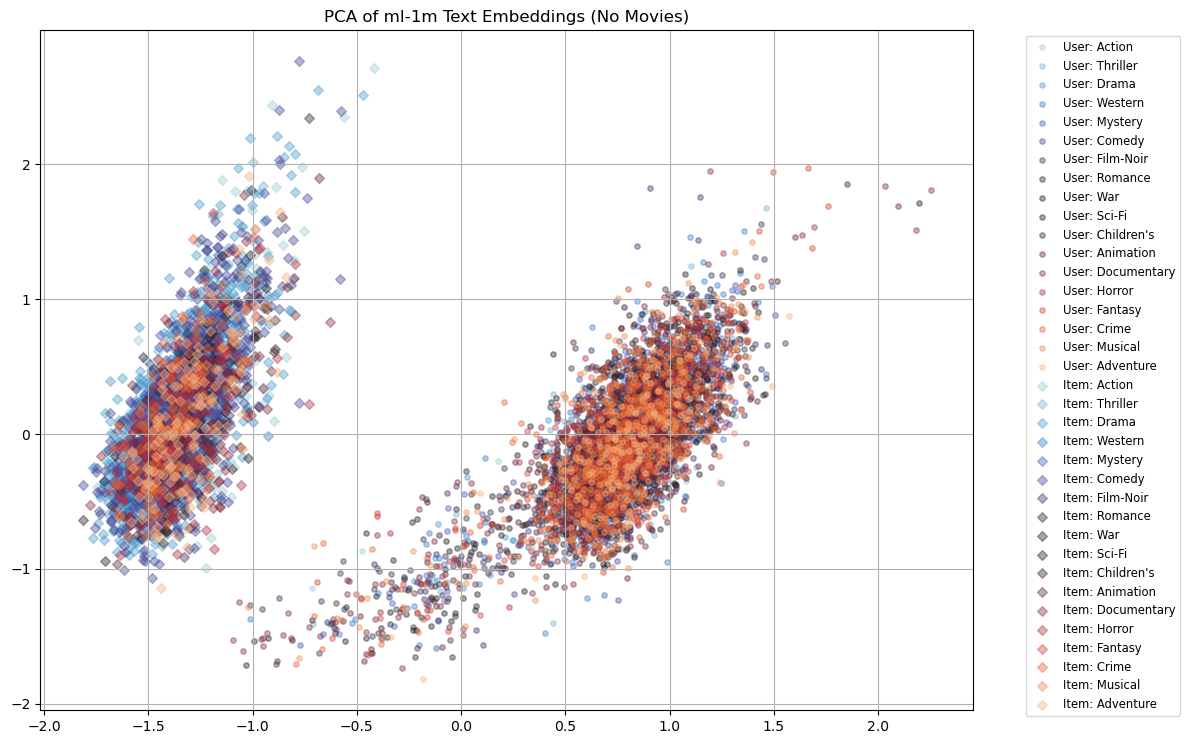

In [89]:
# Step 4: Plot
plt.figure(figsize=(12, 8))

# Plot user embeddings in gray
for genre in unique_genres:
    idxs = [i for i, g in enumerate(user_primary_genres) if g == genre]
    genre_points = pca_user_embeddings_2d1[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], label=f'User: {genre}', s=15, alpha=0.4)

# Plot items with color based on primary genre
for genre in unique_genres:
    idxs = [i for i, g in enumerate(primary_genres) if g == genre]
    genre_points = pca_item_embeddings_2d1[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], marker='D', label=f'Item: {genre}', s=25, alpha=0.4)

# Plot settings
plt.title("PCA of ml-1m Text Embeddings (No Movies)")
plt.legend(markerscale=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

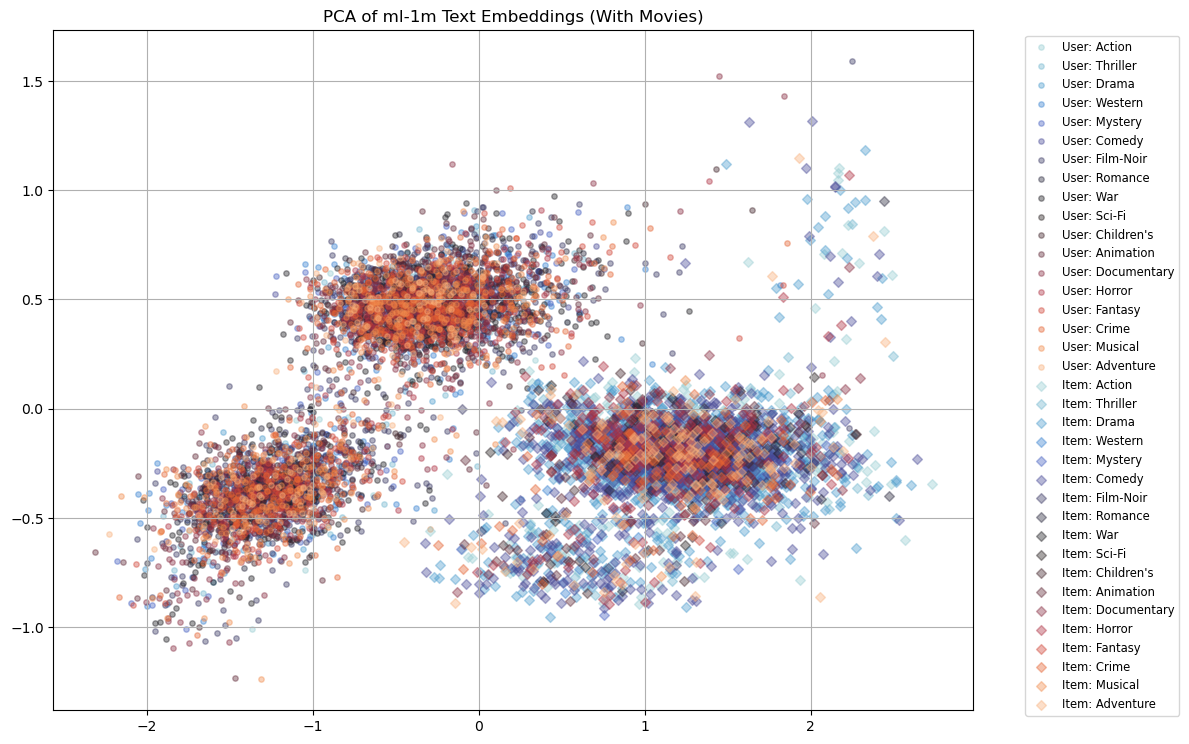

In [90]:
# Step 4: Plot
plt.figure(figsize=(12, 8))

# Plot user embeddings in gray
for genre in unique_genres:
    idxs = [i for i, g in enumerate(user_primary_genres) if g == genre]
    genre_points = pca_user_embeddings_2d2[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], label=f'User: {genre}', s=15, alpha=0.4)

# Plot items with color based on primary genre
for genre in unique_genres:
    idxs = [i for i, g in enumerate(primary_genres) if g == genre]
    genre_points = pca_item_embeddings_2d2[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], marker='D', label=f'Item: {genre}', s=25, alpha=0.4)

# Plot settings
plt.title("PCA of ml-1m Text Embeddings (With Movies)")
plt.legend(markerscale=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

### UMAP

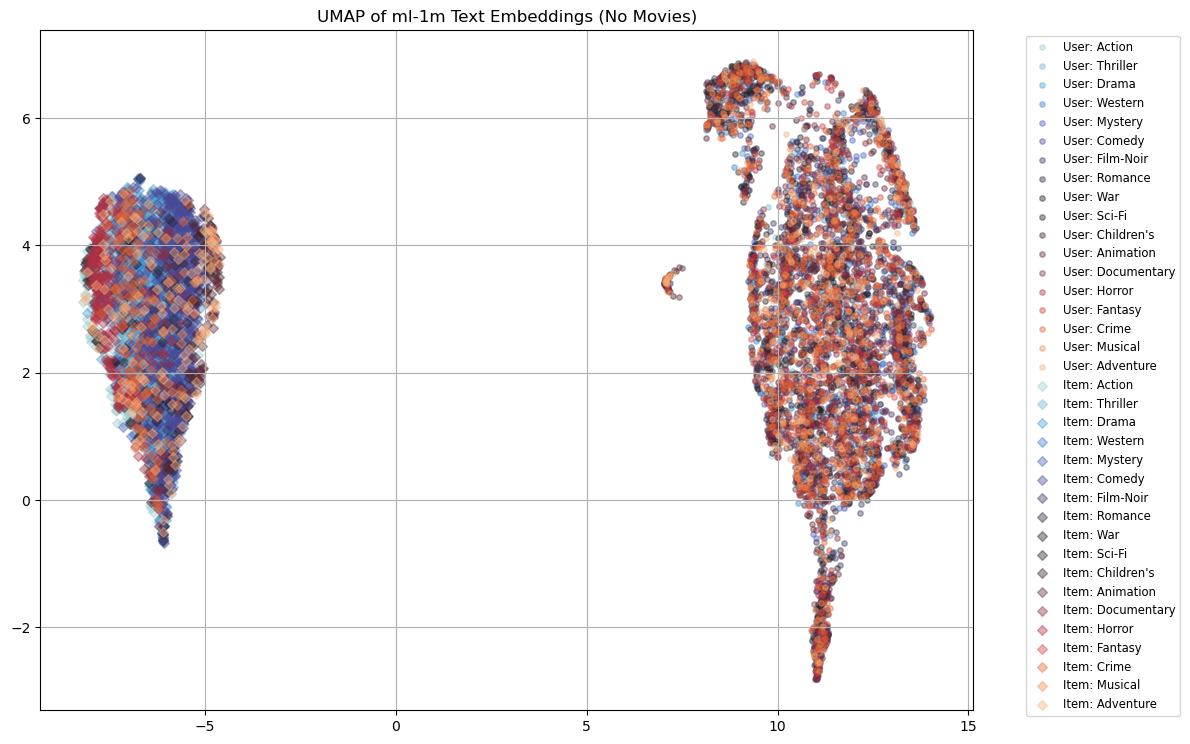

In [91]:
# Step 4: Plot
plt.figure(figsize=(12, 8))

# Plot user embeddings in gray
for genre in unique_genres:
    idxs = [i for i, g in enumerate(user_primary_genres) if g == genre]
    genre_points = umap_user_embeddings_2d1[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], label=f'User: {genre}', s=15, alpha=0.4)

# Plot items with color based on primary genre
for genre in unique_genres:
    idxs = [i for i, g in enumerate(primary_genres) if g == genre]
    genre_points = umap_item_embeddings_2d1[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], marker='D', label=f'Item: {genre}', s=25, alpha=0.4)

# Plot settings
plt.title("UMAP of ml-1m Text Embeddings (No Movies)")
plt.legend(markerscale=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

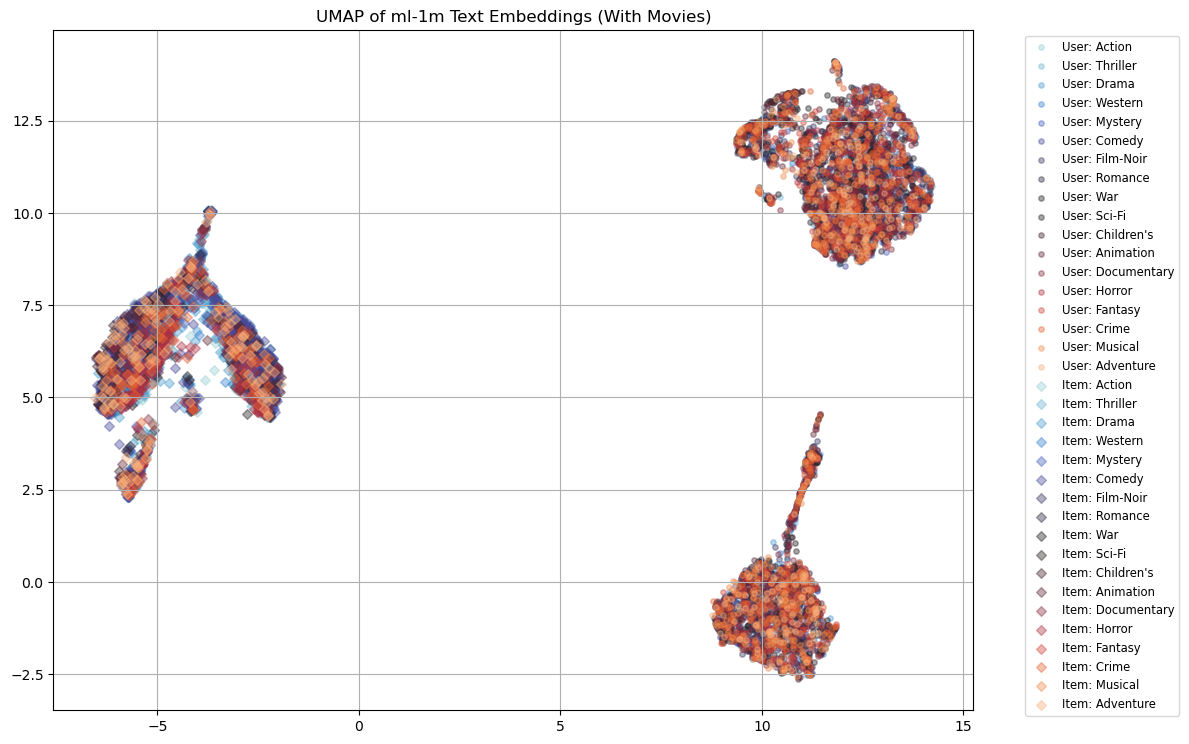

In [92]:
# Step 4: Plot
plt.figure(figsize=(12, 8))

# Plot user embeddings in gray
for genre in unique_genres:
    idxs = [i for i, g in enumerate(user_primary_genres) if g == genre]
    genre_points = umap_user_embeddings_2d2[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], label=f'User: {genre}', s=15, alpha=0.4)

# Plot items with color based on primary genre
for genre in unique_genres:
    idxs = [i for i, g in enumerate(primary_genres) if g == genre]
    genre_points = umap_item_embeddings_2d2[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], marker='D', label=f'Item: {genre}', s=25, alpha=0.4)

# Plot settings
plt.title("UMAP of ml-1m Text Embeddings (With Movies)")
plt.legend(markerscale=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

### t-SNE

## Steam


In [95]:
with open('./data/Steam/embeddings/llama/user_item_text_embeddings.json', 'r') as json_file:
    data = json.load(json_file)

# Initialize user and item embeddings dictionaries
user_embeddings1 = {}
item_embeddings1 = {}

# Iterate over the data and split between users and items
for outer_key, inner_dict in data.items():
    outer_key = int(outer_key)
    
    # If the outer_key is less than `n`, it's a user embedding, otherwise it's an item embedding
    if outer_key < 6040:
        user_embeddings1[outer_key] = {}
        for inner_key, value in inner_dict.items():
            user_embeddings1[outer_key][inner_key] = torch.tensor(value)
    else:
        item_embeddings1[outer_key] = {}
        for inner_key, value in inner_dict.items():
            item_embeddings1[outer_key][inner_key] = torch.tensor(value)

In [96]:

with open('./data/Steam/embeddings/llama/user_item_text_embeddings_games.json', 'r') as json_file:
    data = json.load(json_file)

# Initialize user and item embeddings dictionaries
user_embeddings2 = {}
item_embeddings2 = {}

# Iterate over the data and split between users and items
for outer_key, inner_dict in data.items():
    outer_key = int(outer_key)
    
    # If the outer_key is less than `n`, it's a user embedding, otherwise it's an item embedding
    if outer_key < 6040:
        user_embeddings2[outer_key] = {}
        for inner_key, value in inner_dict.items():
            user_embeddings2[outer_key][inner_key] = torch.tensor(value)
    else:
        item_embeddings2[outer_key] = {}
        for inner_key, value in inner_dict.items():
            item_embeddings2[outer_key][inner_key] = torch.tensor(value)

In [97]:
# Separate text and image embeddings
user_item_embeddings1 = {}

# Add user keys with 'user_' prefix
for k, v in user_embeddings1.items():
    user_item_embeddings1[f"user_{k}"] = v

# Add item keys with 'item_' prefix
for k, v in item_embeddings1.items():
    user_item_embeddings1[f"item_{k}"] = v
     
# Making 1 dict for the text embeddings
text_embeddings1 = {k: v['text_embedding'] for k, v in user_item_embeddings1 .items()}

text_embeddings1 = torch.stack(list(text_embeddings1.values()))


In [98]:
# Separate text and image embeddings
user_item_embeddings2 = {}

# Add user keys with 'user_' prefix
for k, v in user_embeddings2.items():
    user_item_embeddings2[f"user_{k}"] = v

# Add item keys with 'item_' prefix
for k, v in item_embeddings2.items():
    user_item_embeddings2[f"item_{k}"] = v
     
# Making 1 dict for the text embeddings
text_embeddings2 = {k: v['text_embedding'] for k, v in user_item_embeddings2 .items()}

text_embeddings2 = torch.stack(list(text_embeddings2.values()))


### Compute

In [99]:
#PCA
reducer = PCA(n_components=2)
pca_embeddings_2d1 = reducer.fit_transform(text_embeddings1)
pca_user_embeddings_2d1 = pca_embeddings_2d1[:len(user_embeddings1)]
pca_item_embeddings_2d1 = pca_embeddings_2d1[len(user_embeddings1):]


reducer = PCA(n_components=2)
pca_embeddings_2d2 = reducer.fit_transform(text_embeddings2)
pca_user_embeddings_2d2 = pca_embeddings_2d2[:len(user_embeddings2)]
pca_item_embeddings_2d2 = pca_embeddings_2d2[len(user_embeddings2):]



In [100]:
import umap.umap_ as umap
#UMAP
reducer = umap.UMAP(n_components=2, random_state=10)
umap_embeddings_2d1 = reducer.fit_transform(text_embeddings1)
umap_user_embeddings_2d1 = umap_embeddings_2d1[:len(user_embeddings1)]
umap_item_embeddings_2d1 = umap_embeddings_2d1[len(user_embeddings1):]


umap_embeddings_2d2 = reducer.fit_transform(text_embeddings2)
umap_user_embeddings_2d2 = umap_embeddings_2d2[:len(user_embeddings2)]
umap_item_embeddings_2d2 = umap_embeddings_2d2[len(user_embeddings2):]


/Users/zacpangan/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
#t-SNE
pca = PCA(n_components=50)
reduced1 = pca.fit_transform(text_embeddings1)
tsne1 = TSNE(n_components=2, perplexity=30, init='pca', random_state=42)
tsne_2d1 = tsne1.fit_transform(reduced1)
tsne_user_embeddings_2d1 = tsne_2d1[:len(user_embeddings1)]
tsne_item_embeddings_2d1 = tsne_2d1[len(user_embeddings1):]


/Users/zacpangan/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
pca = PCA(n_components=50)
reduced2 = pca.fit_transform(text_embeddings2)
tsne2 = TSNE(n_components=2, perplexity=30, init='pca', random_state=42)
tsne_2d2 = tsne1.fit_transform(reduced2)
tsne_user_embeddings_2d2 = tsne_2d2[:len(user_embeddings2)]
tsne_item_embeddings_2d2 = tsne_2d2[len(user_embeddings2):]

In [101]:
# Load Genres
import ast
game = pd.read_csv('./data/Steam/games_cleaned.csv')
users = pd.read_csv('./data/Steam/users_cleaned.csv')
game_mapping = {val: key for key, val in enumerate(game['id'])}
user_mapping = {val: key for key, val in enumerate(users['user_id'])}

game_genres = game['genres'].apply(lambda x: ast.literal_eval(x))
item_genres = {key: ','.join(game_genres[val]).split(',') for key, val in game_mapping.items() if val in game_genres.index}
item_genres

user_genres = users['genres'].apply(lambda x: ast.literal_eval(x))
user_genres = {key: ','.join(user_genres[val]).split(',') for key, val in user_mapping.items() if val in user_genres.index}
user_genres

unique_genres = sorted(set(g for genres in item_genres.values() for g in genres))

In [102]:
# Step 3: Use primary genre (first genre) for coloring
primary_genres = [genres[0] if genres else "Unknown" for genres in item_genres.values()]
user_primary_genres = [genres[0] if genres else "Unknown" for genres in user_genres.values()]
unique_genres = list(set(primary_genres))
palette = sns.color_palette("icefire", len(unique_genres))
genre_to_color = {genre: palette[i] for i, genre in enumerate(unique_genres)}
item_colors = [genre_to_color[genre] for genre in unique_genres]
user_colors = [genre_to_color[genre] for genre in user_primary_genres]


### PCA

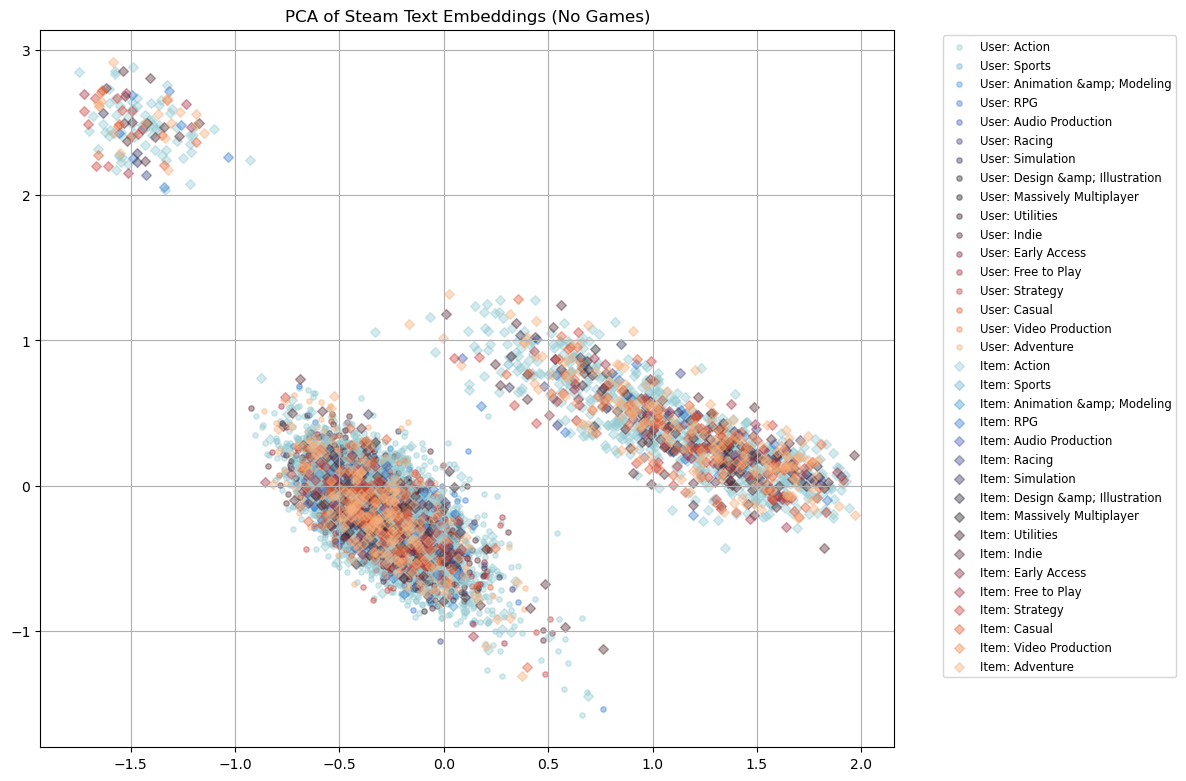

In [103]:
# Step 4: Plot
plt.figure(figsize=(12, 8))

# Plot user embeddings in gray
for genre in unique_genres:
    idxs = [i for i, g in enumerate(user_primary_genres[:6040]) if g == genre]
    genre_points = pca_user_embeddings_2d1[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], label=f'User: {genre}', s=15, alpha=0.4)

# Plot items with color based on primary genre
for genre in unique_genres:
    idxs = [i for i, g in enumerate(primary_genres) if g == genre]
    genre_points = pca_item_embeddings_2d1[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], marker='D', label=f'Item: {genre}', s=25, alpha=0.4)

# Plot settings
plt.title("PCA of Steam Text Embeddings (No Games)")
plt.legend(markerscale=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

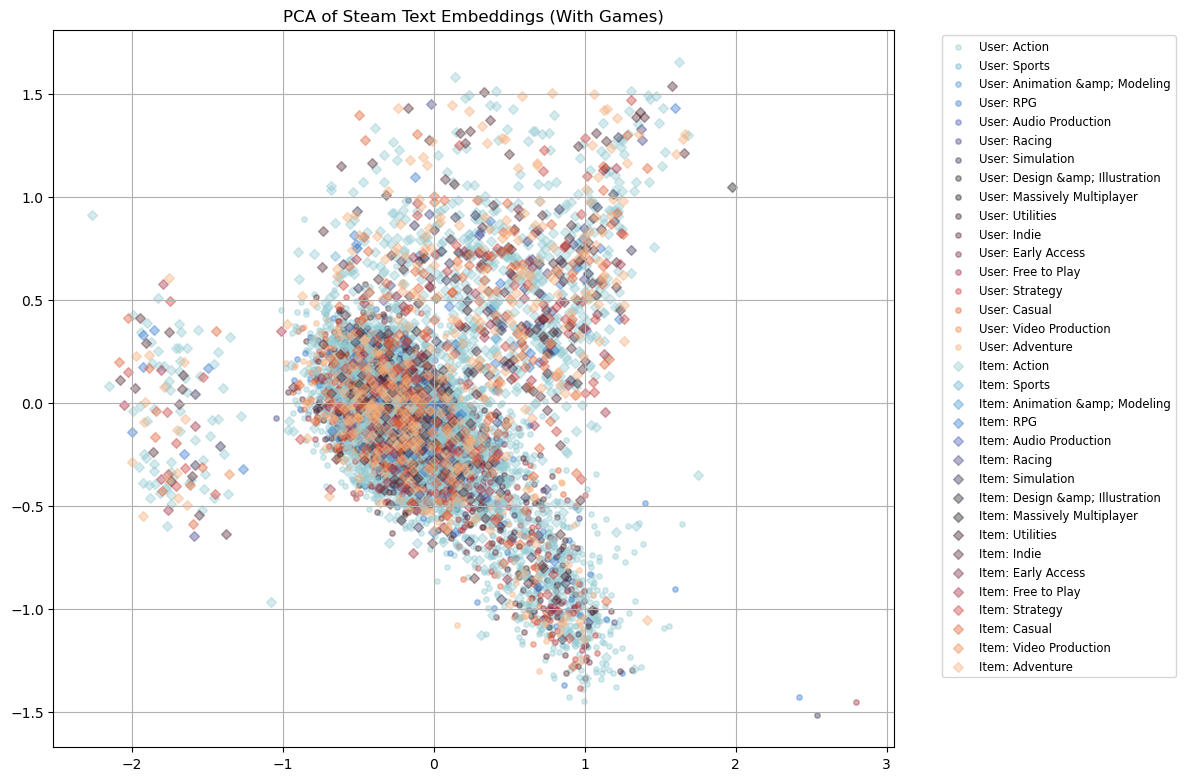

In [104]:
# Step 4: Plot
plt.figure(figsize=(12, 8))

# Plot user embeddings in gray
for genre in unique_genres:
    idxs = [i for i, g in enumerate(user_primary_genres[:6040]) if g == genre]
    genre_points = pca_user_embeddings_2d2[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], label=f'User: {genre}', s=15, alpha=0.4)

# Plot items with color based on primary genre
for genre in unique_genres:
    idxs = [i for i, g in enumerate(primary_genres) if g == genre]
    genre_points = pca_item_embeddings_2d2[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], marker='D', label=f'Item: {genre}', s=25, alpha=0.4)

# Plot settings
plt.title("PCA of Steam Text Embeddings (With Games)")
plt.legend(markerscale=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

### UMAP

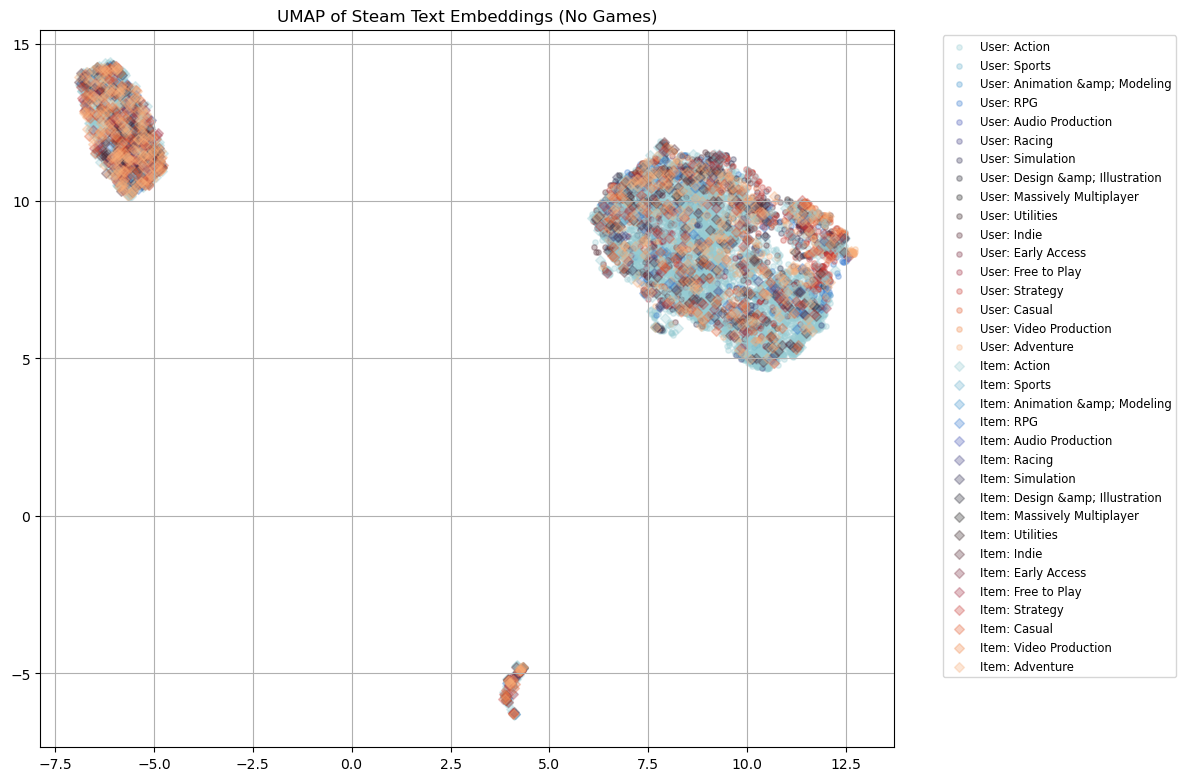

In [105]:
# Step 4: Plot
plt.figure(figsize=(12, 8))

# Plot user embeddings in gray
for genre in unique_genres:
    idxs = [i for i, g in enumerate(user_primary_genres[:6040]) if g == genre]
    genre_points = umap_user_embeddings_2d1[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], label=f'User: {genre}', s=15, alpha=0.3)

# Plot items with color based on primary genre
for genre in unique_genres:
    idxs = [i for i, g in enumerate(primary_genres) if g == genre]
    genre_points = umap_item_embeddings_2d1[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], marker='D', label=f'Item: {genre}', s=25, alpha=0.3)

# Plot settings
plt.title("UMAP of Steam Text Embeddings (No Games)")
plt.legend(markerscale=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

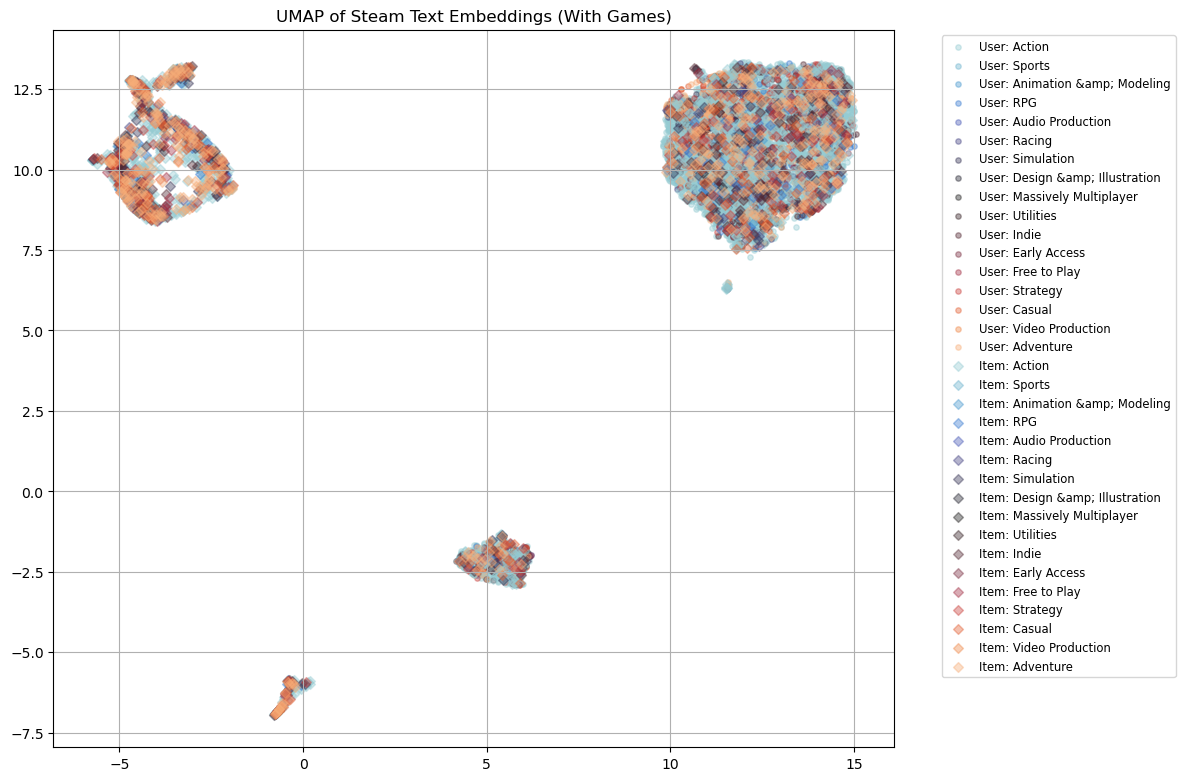

In [106]:
# Step 4: Plot
plt.figure(figsize=(12, 8))

# Plot user embeddings in gray
for genre in unique_genres:
    idxs = [i for i, g in enumerate(user_primary_genres[:6040]) if g == genre]
    genre_points = umap_user_embeddings_2d2[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], label=f'User: {genre}', s=15, alpha=0.4)

# Plot items with color based on primary genre
for genre in unique_genres:
    idxs = [i for i, g in enumerate(primary_genres) if g == genre]
    genre_points = umap_item_embeddings_2d2[idxs]
    plt.scatter(genre_points[:, 0], genre_points[:, 1], c=[genre_to_color[genre]], marker='D', label=f'Item: {genre}', s=25, alpha=0.4)

# Plot settings
plt.title("UMAP of Steam Text Embeddings (With Games)")
plt.legend(markerscale=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize Results

In [59]:
# Python script to visualize diversity and accuracy improvements among baseline and SOTA models

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define data for ML-1M and Steam datasets
ml1m_data = {
    'Model': ['DGRec', 'Re-ranking' , 'Popularity', 'MF', 'GPT 4.0 (Zero-shot)', 'LightGCN (Base)', 'Semantic Augmentation  \n(Persona + Categories)', 'Topological Augmentation \n(Item-Item)', 'Combined Augmentation \n(Persona + Categories + Items & \nItem-Item)'],
    'Recall': [0.05541, 0.09648, 0.03926, 0.0228, 0.00618, 0.10248, 0.13215, 0.12586, 0.13202],
    'Precision': [0.04615, 0.05385, 0.00387, 0.00605, 0.00030, 0.07679, 0.08403, 0.08287, 0.08179],
    'nDCG': [0.08237, 0.08251, 0.02027, 0.0554, 0.00242, 0.12142, 0.1314, 0.12792, 0.13114],
    'Category Coverage': [0.40432, 0.61506, 0.35902, 0.40007, 0.51541, 0.5538, 0.63643, 0.63777, 0.66425],
    'Item Coverage': [0.04324,  0.05943, 0.00329, 0.01655, 0.05406, 0.05659, 0.0602, 0.05573, 0.05908]
}

steam_data = {
    'Model': ['DGRec', 'Re-ranking' , 'Popularity', 'MF', 'GPT 4.0 (Zero-shot)', 'LightGCN (Base)', 'Semantic Augmentation \n(Persona + Categories + Items)', 'Topological Augmenataion \n(User-Item + Item-Item)', 'Combined Augmentation \n(Persona + Categories + Items & \nUser-Item + Item-Item )'],
    'Recall': [0.04296, 0.04623, 0.04011, 0.04777, 0.00149, 0.05627, 0.05869, 0.08444, 0.08216],
    'Precision': [0.00112, 0.00457, 0.00393, 0.00408, 0.00001, 0.00347, 0.00363, 0.00514, 0.0051],
    'nDCG': [0.01929, 0.02669, 0.0232, 0.0228, 0.00004, 0.02532, 0.0236, 0.03284, 0.0307],
    'Category Coverage': [0.34056, .52340, 0.16887, 0.35249, 0.48386, 0.49821, 0.51716, 0.50317, 0.53172],
    'Item Coverage': [0.0537, 0.088450, 0.00432, 0.04482, 0.03323, 0.086799, 0.08928, 0.091333, 0.09001]
}

ml1m_ablation_data = {
    'Model': ['0', 'A', 'B', '1', '2', '3', 'A1', 'A2', 'A3', 'B1', 'B2', 'B3'],
    'Recall': [0.10248, 0.13215, 0.1324, 0.11684, 0.12586, 0.11196, 0.11988, 0.13091, 0.11297, 0.10564, 0.13202, 0.11739],
    'Precision': [0.07679, 0.08403, 0.08409, 0.08496, 0.08287, 0.08358, 0.0845, 0.08271, 0.08294, 0.08251, 0.08179, 0.08286],
    'nDCG': [0.12142, 0.1314, 0.13372, 0.12591, 0.12792, 0.12212, 0.12546, 0.13113, 0.12288, 0.12214, 0.13114, 0.1237],
    'Category Coverage': [0.5538, 0.63643, 0.63306, 0.52381, 0.63777, 0.51136, 0.54291, 0.65423, 0.54098, 0.54092, 0.66425, 0.56622],
    'Item Coverage': [0.05659, 0.0602, 0.05743, 0.0597, 0.05573, 0.05414, 0.0621, 0.0572, 0.05229, 0.05705, 0.05908, 0.05701]
}

steam_ablation_data = {
    'Model': ['0', 'A', 'B', '1', '2', '3', 'A1', 'A2', 'A3', 'B1', 'B2', 'B3'],
    'Recall': [0.05627, 0.0539, 0.05869, 0.05167, 0.04613, 0.08444, 0.05867, 0.06321, 0.07689, 0.05946, 0.05232, 0.08216],
    'Precision': [0.00347, 0.00341, 0.00363, 0.00343, 0.00288, 0.00514, 0.00368, 0.00381, 0.00477, 0.00376, 0.0032, 0.0051],
    'nDCG': [0.02532, 0.02247, 0.0236, 0.02167, 0.01824, 0.03284, 0.02156, 0.02557, 0.03183, 0.02415, 0.02239, 0.0307],
    'Category Coverage': [0.49821, 0.5054, 0.51716, 0.48097, 0.48495, 0.50317, 0.4854, 0.52793, 0.48467, 0.47525, 0.49181, 0.53172],
    'Item Coverage': [0.086799, 0.08757, 0.08928, 0.087687, 0.088494, 0.091333, 0.08695, 0.08835, 0.08929, 0.08581, 0.08924, 0.09001]
}

# Convert data to DataFrames
ml1m_df = pd.DataFrame(ml1m_data)
ml1m_ablation_df = pd.DataFrame(ml1m_ablation_data)
steam_ablation_df = pd.DataFrame(steam_ablation_data)
steam_df = pd.DataFrame(steam_data)



In [87]:
import pandas as pd

# Improvement values for ML-1M and Steam datasets
improvement_ml1m = [28.95, 9.43, 8.22, 6.38, 19.94]
improvement_steam = [50.06, 25.98, 29.70, 5.22, 6.73]

# Adding the Improvement row to the ML-1M dataset
improvement_row_ml1m = pd.DataFrame([['Improvement (%)'] + improvement_ml1m], 
                                    columns=ml1m_df.columns)
ml1m_df = pd.concat([ml1m_df, improvement_row_ml1m], ignore_index=True)

# Adding the Improvement row to the Steam dataset
improvement_row_steam = pd.DataFrame([['Improvement (%)'] + improvement_steam], 
                                     columns=steam_df.columns)
steam_df = pd.concat([steam_df, improvement_row_steam], ignore_index=True)

print("Updated ML-1M Dataset:")
print(ml1m_df)
print("\nUpdated Steam Dataset:")
print(steam_df)


Updated ML-1M Dataset:
                                 Model    Recall  Precision     nDCG  \
0                                DGRec   0.05541    0.04615  0.08237   
1                           Popularity   0.03926    0.00387  0.02027   
2                                   MF   0.02280    0.00605  0.05540   
3                  GPT 4.0 (Zero-shot)   0.00618    0.00030  0.00242   
4                      LightGCN (Base)   0.10248    0.07679  0.12142   
5           Embedding Augmentation (A)   0.13215    0.08403  0.13140   
6               Graph Augmentation (2)   0.12586    0.08287  0.12792   
7  Embedding + Graph Augmentation (B2)   0.13202    0.08179  0.13114   
8                      Improvement (%)  28.95000    9.43000  8.22000   

   Category Coverage  Item Coverage  
0            0.40432        0.04324  
1            0.35902        0.00329  
2            0.40007        0.01655  
3            0.51541        0.05406  
4            0.55380        0.05659  
5            0.63643        

/var/folders/5x/87gs962j3hzbnvy7dy2jv5280000gn/T/ipykernel_54777/653981189.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


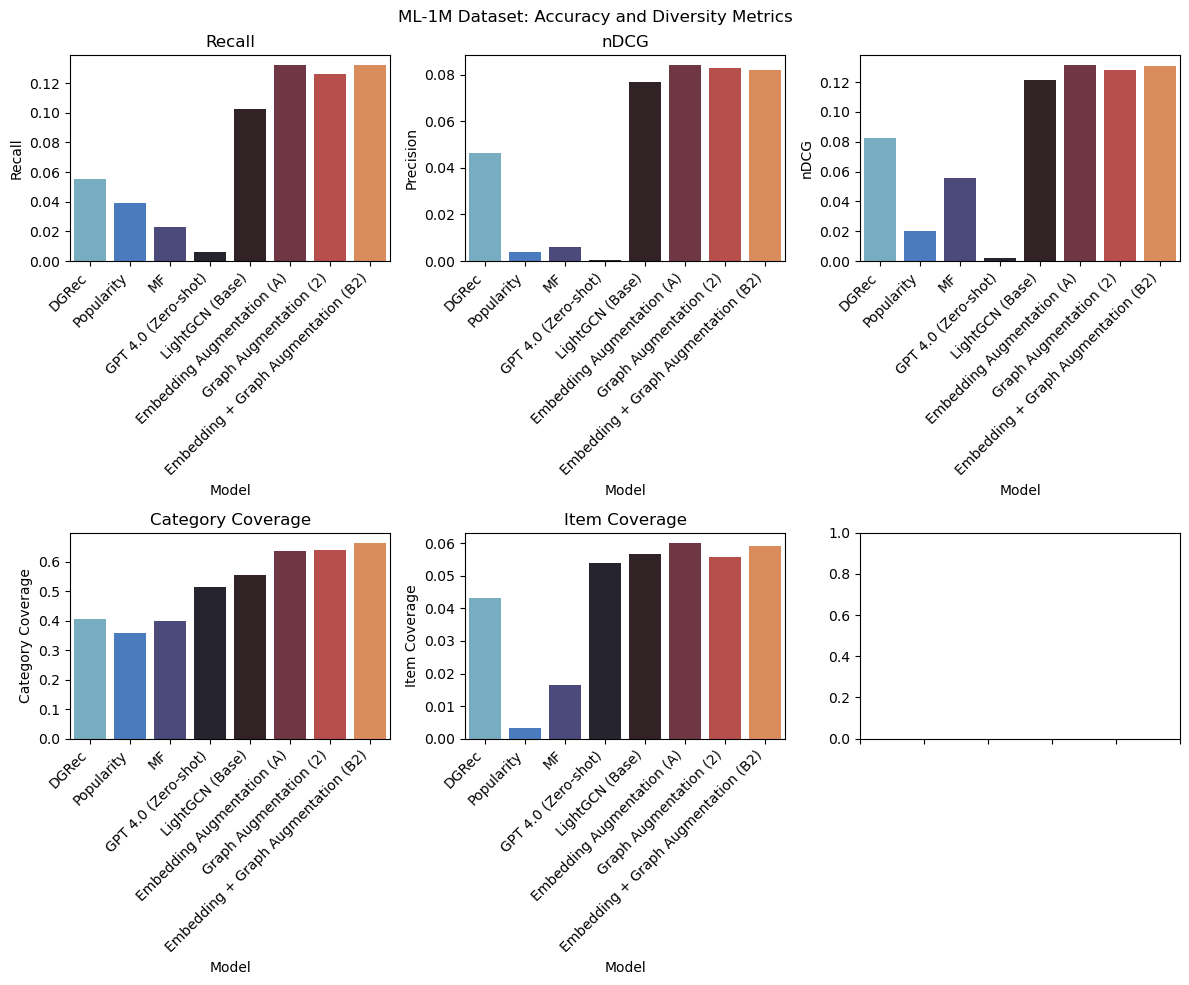

/var/folders/5x/87gs962j3hzbnvy7dy2jv5280000gn/T/ipykernel_54777/653981189.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


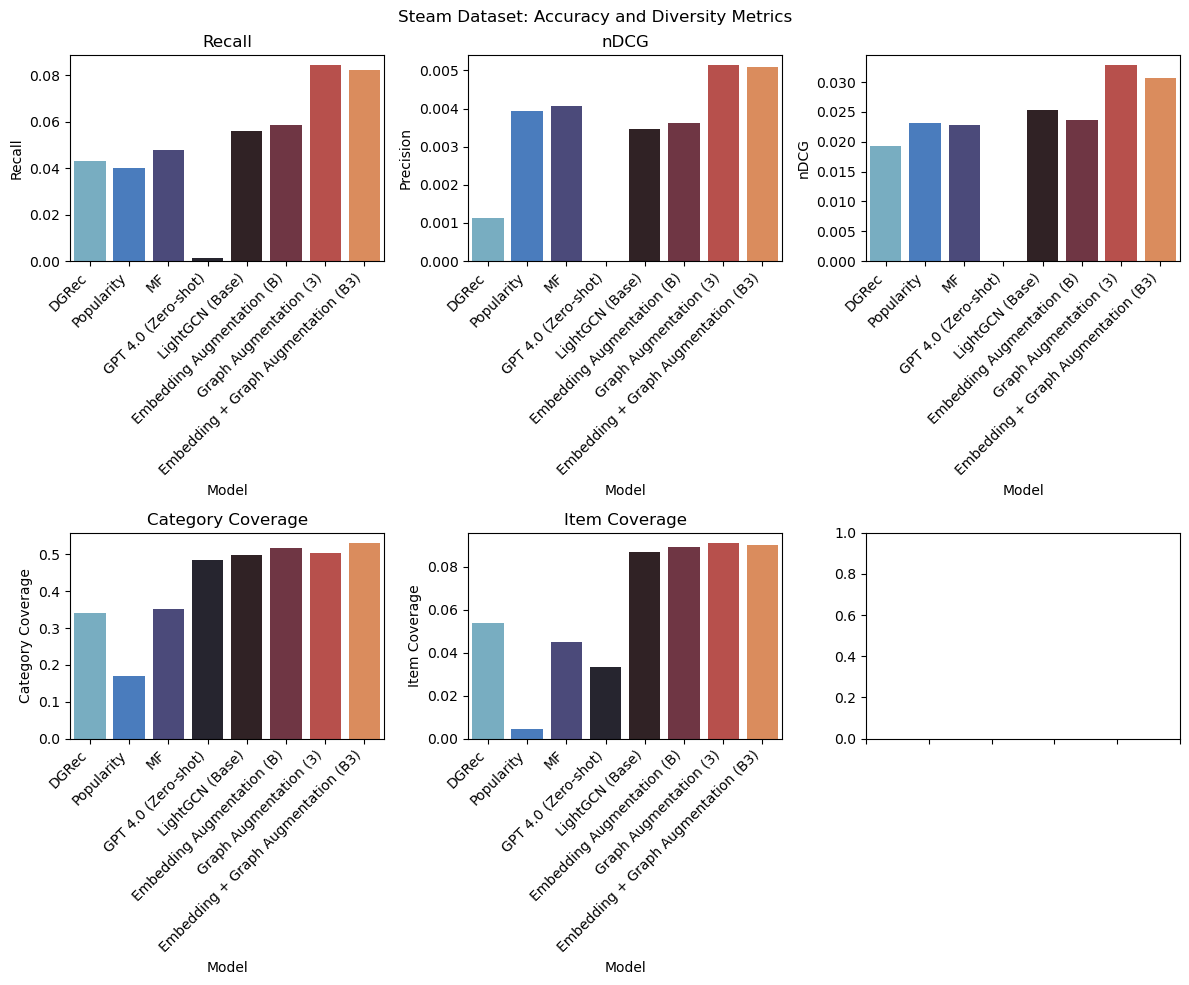

In [47]:
# Plot function
def plot_metrics(df, title):
    fig, axes = plt.subplots(2, 3, figsize=(12, 10))
    sns.barplot(data=df, x='Model', y='Recall', ax=axes[0, 0], palette="icefire")
    axes[0, 0].set_title('Recall')
    sns.barplot(data=df, x='Model', y='Precision', ax=axes[0, 1], palette="icefire")
    axes[0, 1].set_title('Precision')
    sns.barplot(data=df, x='Model', y='nDCG', ax=axes[0, 2], palette="icefire")
    axes[0, 1].set_title('nDCG')
    sns.barplot(data=df, x='Model', y='Category Coverage', ax=axes[1, 0], palette="icefire")
    axes[1, 0].set_title('Category Coverage')
    sns.barplot(data=df, x='Model', y='Item Coverage', ax=axes[1, 1], palette="icefire")
    axes[1, 1].set_title('Item Coverage')
    fig.suptitle(title)
    for ax in axes.flatten():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot results for both datasets
plot_metrics(ml1m_df, 'ML-1M Dataset: Accuracy and Diversity Metrics')
plot_metrics(steam_df, 'Steam Dataset: Accuracy and Diversity Metrics')


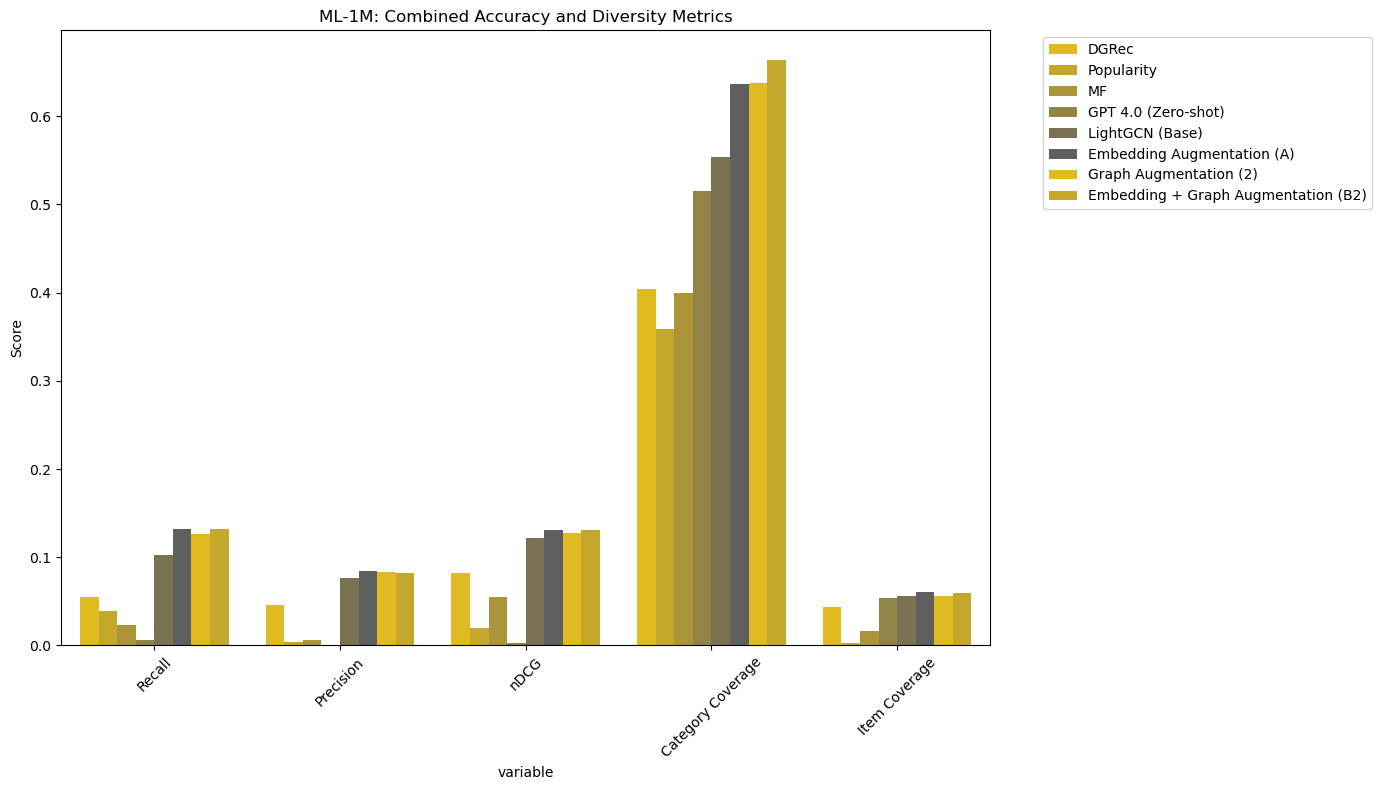

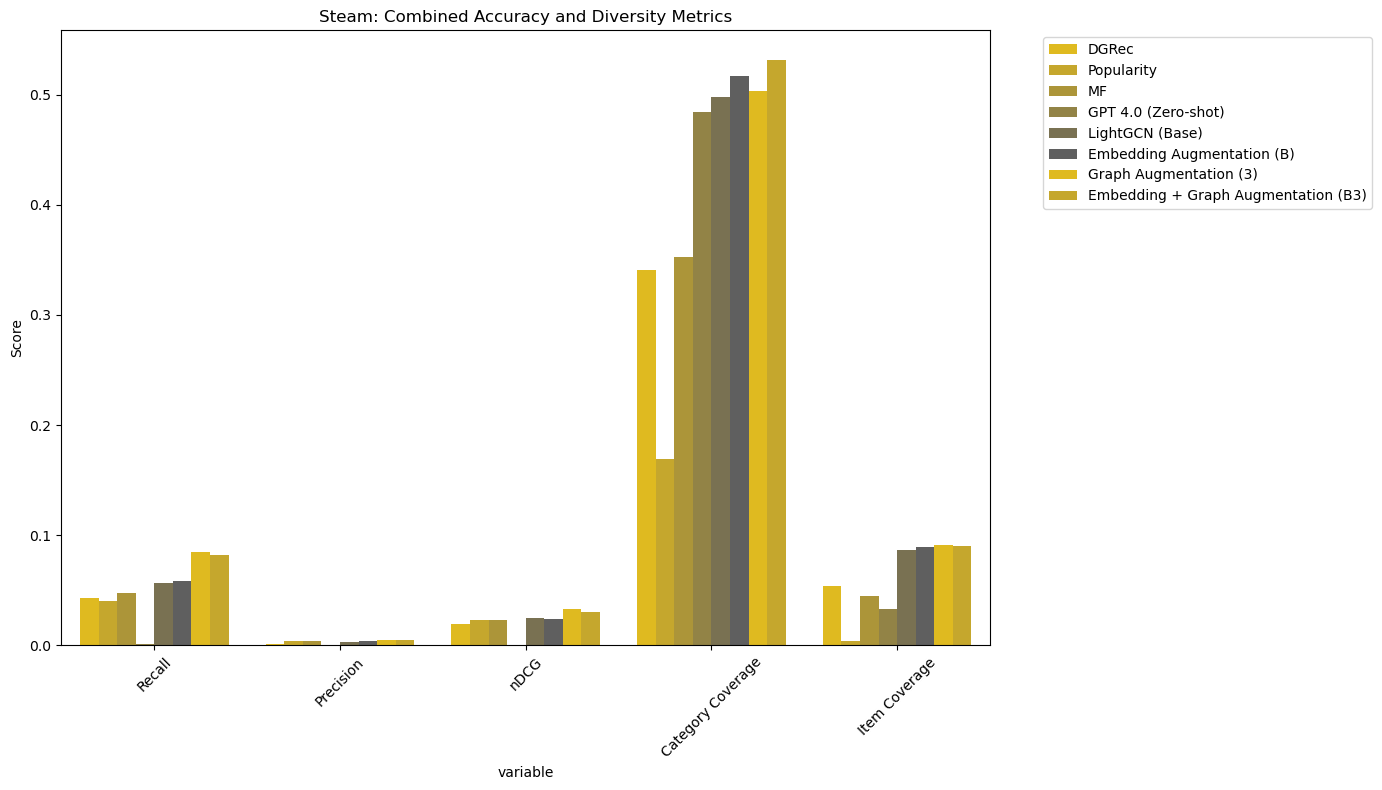

In [22]:
# Multi-Metric Bar Plot
def multi_metric_barplot(df, title):
    metrics = ['Recall', 'Precision', 'nDCG', 'Category Coverage', 'Item Coverage']
    melted_df = df.melt(id_vars='Model', value_vars=metrics)
    plt.figure(figsize=(14, 8))
    sns.barplot(data=melted_df, x='variable', y='value', hue='Model', dodge=True, palette=sns.color_palette("blend:#ffcd00ff,#5f5f5fff"))
    plt.title(title + ': Combined Accuracy and Diversity Metrics')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot results for both datasets
multi_metric_barplot(ml1m_df, 'ML-1M')
multi_metric_barplot(steam_df, 'Steam')

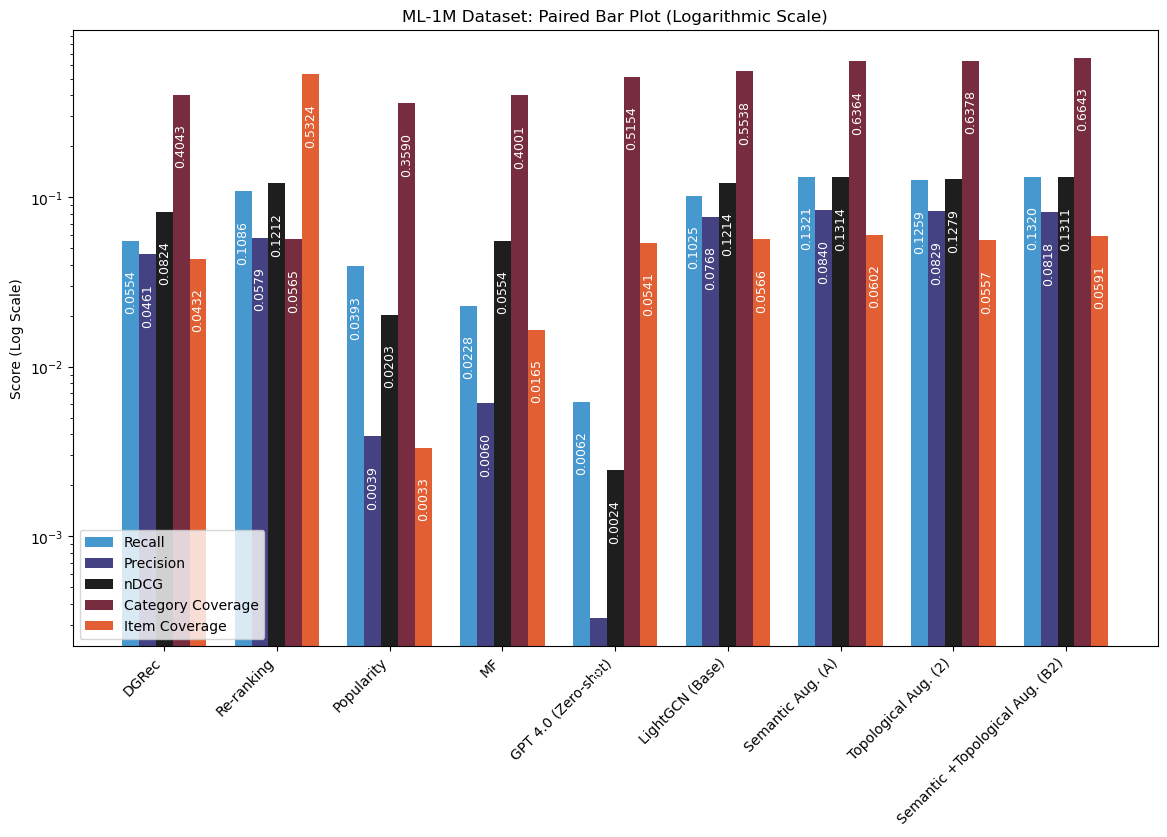

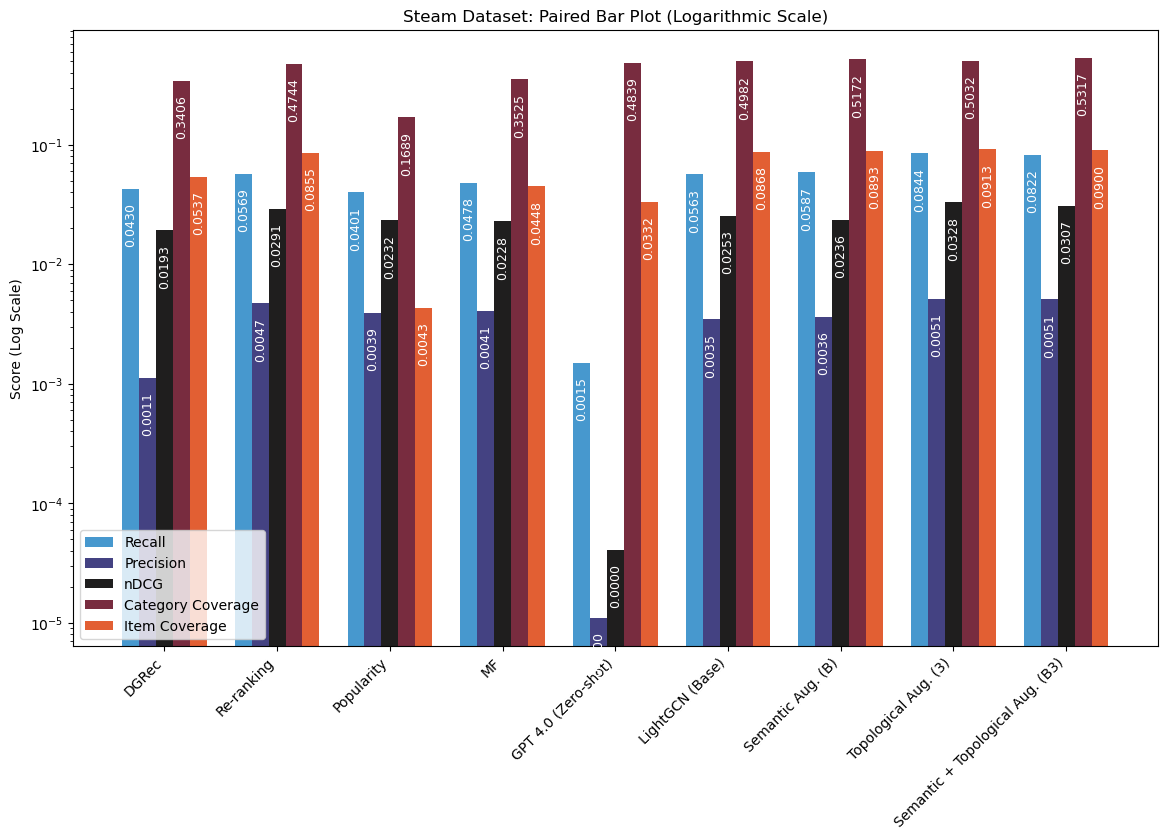

In [51]:
# Heatmap of Metrics

def plot_heatmap(df, title):
    plt.figure(figsize=(12, 8))
    heatmap_data = df.set_index('Model').T
    sns.heatmap(heatmap_data, annot=True, cmap=sns.color_palette("icefire", as_cmap=True), norm=plt.matplotlib.colors.LogNorm())
    plt.title(title + ': Heatmap of Metrics')
    plt.show()


# Paired Bar Plot with Logarithmic Y-Axis, IceFire Color Palette, Full Opacity, and Inside Bar Value Display
def paired_barplot(df, title):
    fig, ax = plt.subplots(figsize=(14, 8))
    bar_width = 0.15  # Reduce bar width for better spacing
    metrics = ['Recall', 'Precision', 'nDCG', 'Category Coverage', 'Item Coverage']
    palette = sns.color_palette("icefire", len(metrics))  # Use IceFire palette

    # Calculate offset to normalize log scale (avoid zero values)
    min_nonzero = df[metrics].replace(0, np.nan).min().min()
    offset = min_nonzero * 0.1 if min_nonzero > 0 else 1e-4

    for i, metric in enumerate(metrics):
        x = np.arange(len(df['Model']))  # Use np.arange for better spacing
        values = df[metric] + offset  # Offset values for log scale
        # Plot bars with adjusted position and full opacity
        bars = ax.bar(x + bar_width * i, values, bar_width, label=metric, log=True, color=palette[i], alpha=1.0)
        
        # Display values inside the bar at the end
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f'{df[metric][j]:.4f}', 
                    ha='center', va='center', fontsize=9, color='white', rotation=90)  # Inside bar text

    plt.title(title + ': Paired Bar Plot (Logarithmic Scale)')
    plt.ylabel('Score (Log Scale)')
    plt.xticks(x + bar_width * (len(metrics) - 1) / 2, df['Model'], rotation=45, ha='right')
    plt.yscale('log')  # Set the y-axis to logarithmic scale
    plt.legend(loc='lower left')
    plt.show()


# Plot Heatmap, Paired Bar Plot, Bubble Plot, and Parallel Coordinates Plot for both datasets
#plot_heatmap(ml1m_df, 'ML-1M Dataset')
paired_barplot(ml1m_df, 'ML-1M Dataset')


#plot_heatmap(steam_df, 'Steam Dataset')
paired_barplot(steam_df, 'Steam Dataset')


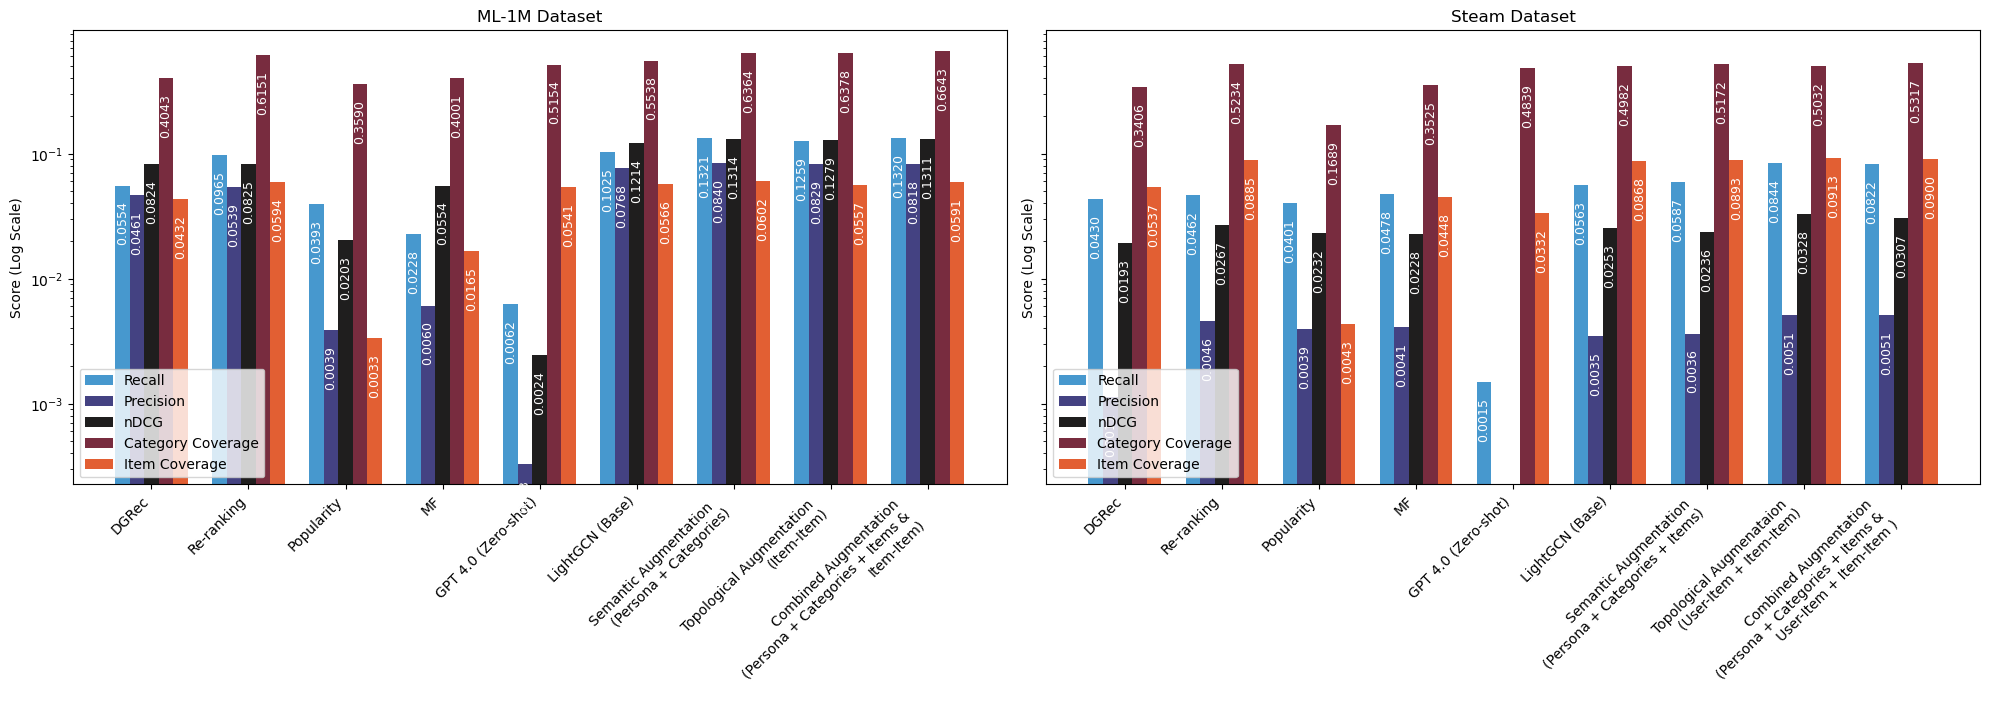

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def paired_barplot_dual(df1, df2, title1, title2):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    bar_width = 0.15  # Reduce bar width for better spacing
    metrics = ['Recall', 'Precision', 'nDCG', 'Category Coverage', 'Item Coverage']
    palette = sns.color_palette("icefire", len(metrics))  # Use IceFire palette

    datasets = [(df1, title1, axes[0]), (df2, title2, axes[1])]

    for df, title, ax in datasets:
        # Calculate offset to normalize log scale (avoid zero values)
        min_nonzero = df[metrics].replace(0, np.nan).min().min()
        offset = min_nonzero * 0.1 if min_nonzero > 0 else 1e-4

        for i, metric in enumerate(metrics):
            x = np.arange(len(df['Model']))  # Use np.arange for better spacing
            values = df[metric] + offset  # Offset values for log scale
            # Plot bars with adjusted position and full opacity
            bars = ax.bar(x + bar_width * i, values, bar_width, label=metric, log=True, color=palette[i], alpha=1.0)

            # Display values inside the bar at the end
            for j, bar in enumerate(bars):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f'{df[metric][j]:.4f}', 
                        ha='center', va='center', fontsize=9, color='white', rotation=90)  # Inside bar text

        ax.set_title(title)
        ax.set_ylabel('Score (Log Scale)')
        ax.set_yscale('log')  # Set the y-axis to logarithmic scale
        ax.set_xticks(x + bar_width * (len(metrics) - 1) / 2)
        ax.set_xticklabels(df['Model'], rotation=45, ha='right')
        ax.legend(loc='lower left')

    plt.tight_layout()
    plt.show()

# Example usage:
paired_barplot_dual(ml1m_df, steam_df, 'ML-1M Dataset', 'Steam Dataset')


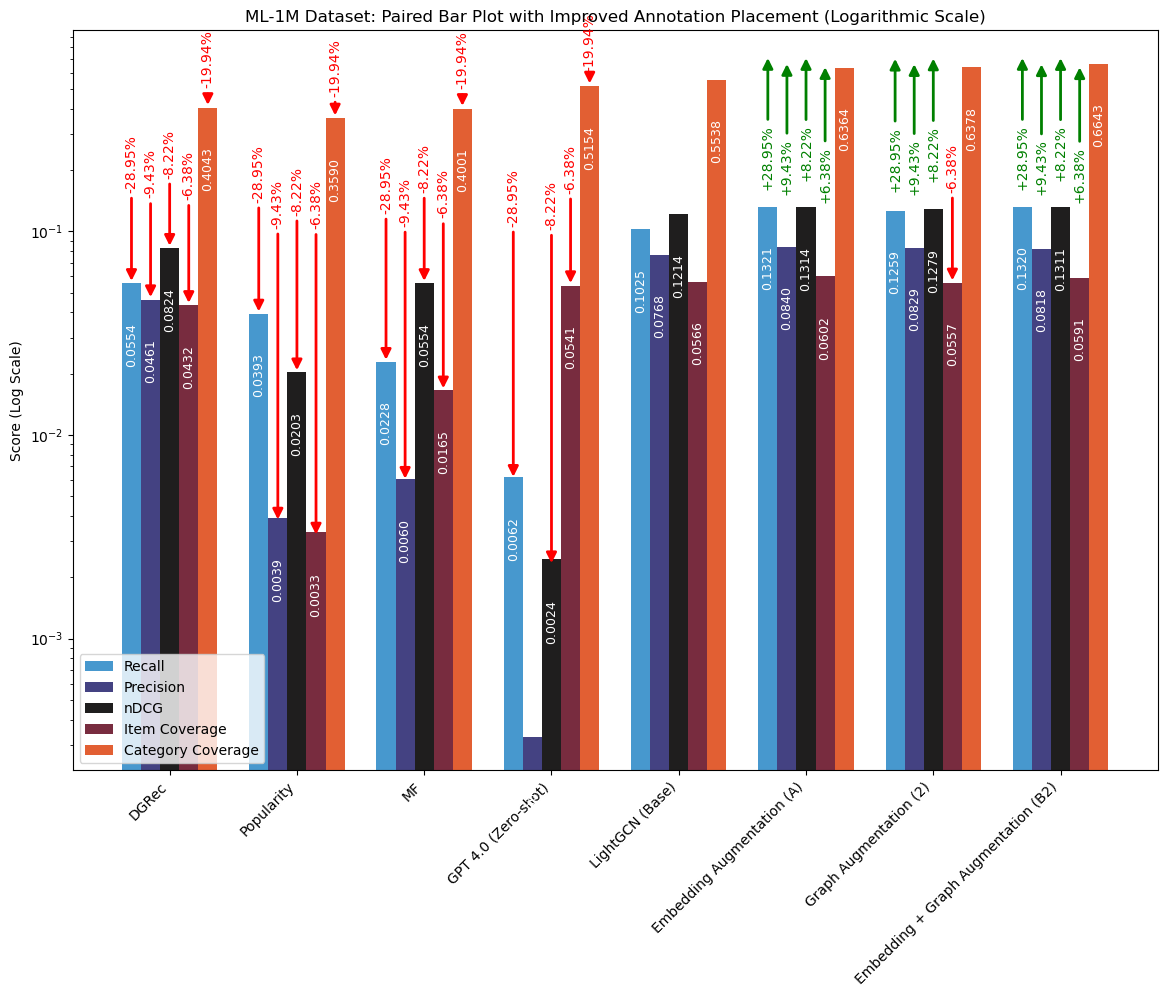

In [171]:
# Paired Bar Plot with Improved Arrows, No Logarithmic Scale for Annotations
def paired_barplot_with_non_overlapping_arrows(df, title, baseline='LightGCN (Base)'):
    fig, ax = plt.subplots(figsize=(14, 10))
    fig.subplots_adjust(top=0.85)  # Add more padding to the top
    bar_width = 0.15  # Reduce bar width for better spacing
    metrics = ['Recall', 'Precision', 'nDCG', 'Item Coverage', 'Category Coverage']
    palette = sns.color_palette("icefire", len(metrics))  # Use IceFire palette

    # Calculate offset to normalize log scale (avoid zero values)
    min_nonzero = df[metrics].replace(0, np.nan).min().min()
    offset = min_nonzero * 0.1 if min_nonzero > 0 else 1e-4

    # Find the baseline values
    baseline_values = df[df['Model'] == baseline][metrics].values.flatten()

    # Calculate improvement dynamically
    improvement_values = []
    if 'ML-1M' in title:
        improvement_values = [28.95, 9.43, 8.22, 6.38, 19.94]
    elif 'Steam' in title:
        improvement_values = [50.06, 25.98, 29.70, 5.22, 6.73]

    for i, metric in enumerate(metrics):
        x = np.arange(len(df['Model']))  # Use np.arange for better spacing
        values = df[metric].astype(float) + offset  # Offset values for log scale
        
        # Plot bars with adjusted position and full opacity
        bars = ax.bar(x + bar_width * i, values, bar_width, label=metric, log=True, color=palette[i], alpha=1.0)

        # Display values inside the bar at the end
        for j, bar in enumerate(bars):
            height = df[metric][j]  # Use raw value for annotation
            ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f'{height:.4f}', 
                    ha='center', va='center', fontsize=9, color='white', rotation=90)  # Inside bar text

            # Add improvement arrows for non-baseline models
            if df['Model'][j] != baseline:
                baseline_value = baseline_values[i]
                improvement_percentage = improvement_values[i]

                # Set arrow properties for better visibility
                arrowprops = dict(arrowstyle='-|>', linewidth=2, mutation_scale=15)

                # Color-coded for positive and negative improvements
                if height > baseline_value:
                    arrowprops['color'] = 'green'
                    improvement_text = f'+{improvement_percentage:.2f}%'
                    arrow_y_offset = height + offset * 5
                    text_y_offset = height + offset * 20
                    # Place the arrow and text in the white space above the bar
                    ax.annotate(improvement_text, 
                                xy=(bar.get_x() + bar.get_width() / 2, arrow_y_offset+0.6), 
                                xytext=(bar.get_x() + bar.get_width() / 2, text_y_offset + 0.2),
                                arrowprops=arrowprops, ha='center', va='top', 
                                fontsize=10, color=arrowprops['color'], rotation=90)

                else:
                    arrowprops['color'] = 'red'
                    improvement_text = f'-{improvement_percentage:.2f}%'
                    arrow_y_offset = height - offset * 5
                    text_y_offset = height - offset * 20
                    # Place the arrow and text in the white space above the bar
                    ax.annotate(improvement_text, 
                                xy=(bar.get_x() + bar.get_width() / 2, arrow_y_offset), 
                                xytext=(bar.get_x() + bar.get_width() / 2, text_y_offset+0.1),
                                arrowprops=arrowprops, ha='center', va='bottom', 
                                fontsize=10, color=arrowprops['color'], rotation=90)

    plt.title(title + ': Paired Bar Plot with Improved Annotation Placement (Logarithmic Scale)')
    plt.ylabel('Score (Log Scale)')
    plt.xticks(x + bar_width * (len(metrics) - 1) / 2, df['Model'], rotation=45, ha='right')
    plt.yscale('log')  # Set the y-axis to logarithmic scale for the bar heights only
    # Set legend at the bottom left
    plt.legend(loc='lower left')
    plt.show()

# Example usage:
paired_barplot_with_non_overlapping_arrows(ml1m_df, 'ML-1M Dataset')


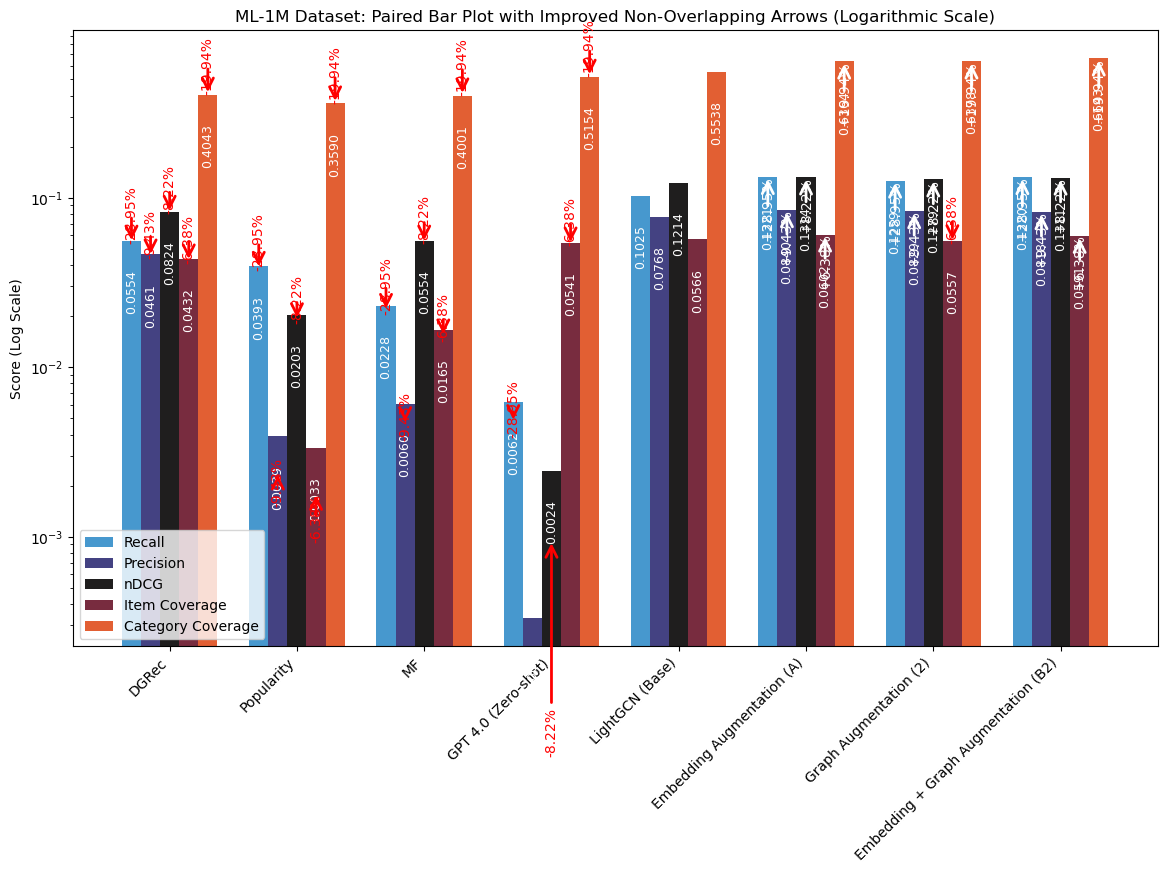

In [125]:
# Paired Bar Plot with Logarithmic Y-Axis, Improved Arrows, and Non-Overlapping Improvement Values
def paired_barplot_with_non_overlapping_arrows(df, title, baseline='LightGCN (Base)'):
    fig, ax = plt.subplots(figsize=(14, 8))
    bar_width = 0.15  # Reduce bar width for better spacing
    metrics = ['Recall', 'Precision', 'nDCG', 'Item Coverage', 'Category Coverage']
    palette = sns.color_palette("icefire", len(metrics))  # Use IceFire palette

    # Calculate offset to normalize log scale (avoid zero values)
    min_nonzero = df[metrics].replace(0, np.nan).min().min()
    offset = min_nonzero * 0.1 if min_nonzero > 0 else 1e-4

    # Find the baseline values
    baseline_values = df[df['Model'] == baseline][metrics].values.flatten()

    # Calculate improvement dynamically
    improvement_values = []
    if 'ML-1M' in title:
        improvement_values = [28.95, 9.43, 8.22, 6.38, 19.94]
    elif 'Steam' in title:
        improvement_values = [50.06, 25.98, 29.70, 5.22, 6.73]

    for i, metric in enumerate(metrics):
        x = np.arange(len(df['Model']))  # Use np.arange for better spacing
        values = df[metric].astype(float) + offset  # Offset values for log scale
        
        # Plot bars with adjusted position and full opacity
        bars = ax.bar(x + bar_width * i, values, bar_width, label=metric, log=True, color=palette[i], alpha=1.0)

        # Display values inside the bar at the end
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f'{df[metric][j]:.4f}', 
                    ha='center', va='center', fontsize=9, color='white', rotation=90)  # Inside bar text

            # Add improvement arrows for non-baseline models
            if df['Model'][j] != baseline:
                baseline_value = baseline_values[i]
                improvement_percentage = improvement_values[i]

                # Set arrow properties for better visibility
                arrowprops = dict(arrowstyle='->', linewidth=2, color='black', mutation_scale=20)

                # Color-coded for positive and negative improvements
                if height > baseline_value:
                    arrowprops['color'] = 'white'
                    improvement_text = f'+{improvement_percentage:.2f}%'
                    # Place the arrow above the bar, with the value in the white space
                    ax.annotate(improvement_text, 
                                xy=(bar.get_x() + bar.get_width() / 2, height + offset * 20), 
                                xytext=(bar.get_x() + bar.get_width() / 2, height + offset * 50),
                                arrowprops=arrowprops, ha='center', va='top', 
                                fontsize=10, color=arrowprops['color'], rotation=90)
                else:
                    arrowprops['color'] = 'red'
                    improvement_text = f'-{improvement_percentage:.2f}%'
                    # Place the arrow below the bar, with the value below the arrow
                    ax.annotate(improvement_text, 
                                xy=(bar.get_x() + bar.get_width() / 2, height - offset * 50), 
                                xytext=(bar.get_x() + bar.get_width() / 2, height - offset * 80),
                                arrowprops=arrowprops, ha='center', va='bottom', 
                                fontsize=10, color=arrowprops['color'], rotation=90)

    plt.title(title + ': Paired Bar Plot with Improved Non-Overlapping Arrows (Logarithmic Scale)')
    plt.ylabel('Score (Log Scale)')
    plt.xticks(x + bar_width * (len(metrics) - 1) / 2, df['Model'], rotation=45, ha='right')
    plt.yscale('log')  # Set the y-axis to logarithmic scale
    # Set legend at the bottom left
    plt.legend(loc='lower left')
    plt.show()

# Example usage:
paired_barplot_with_non_overlapping_arrows(ml1m_df, 'ML-1M Dataset')


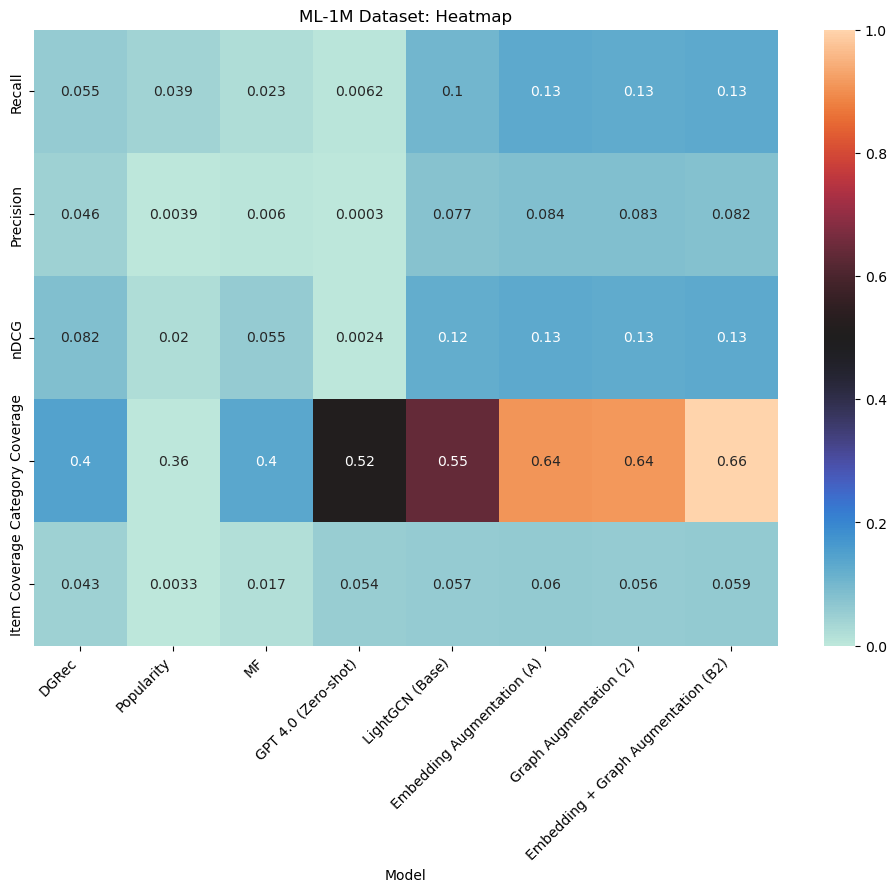

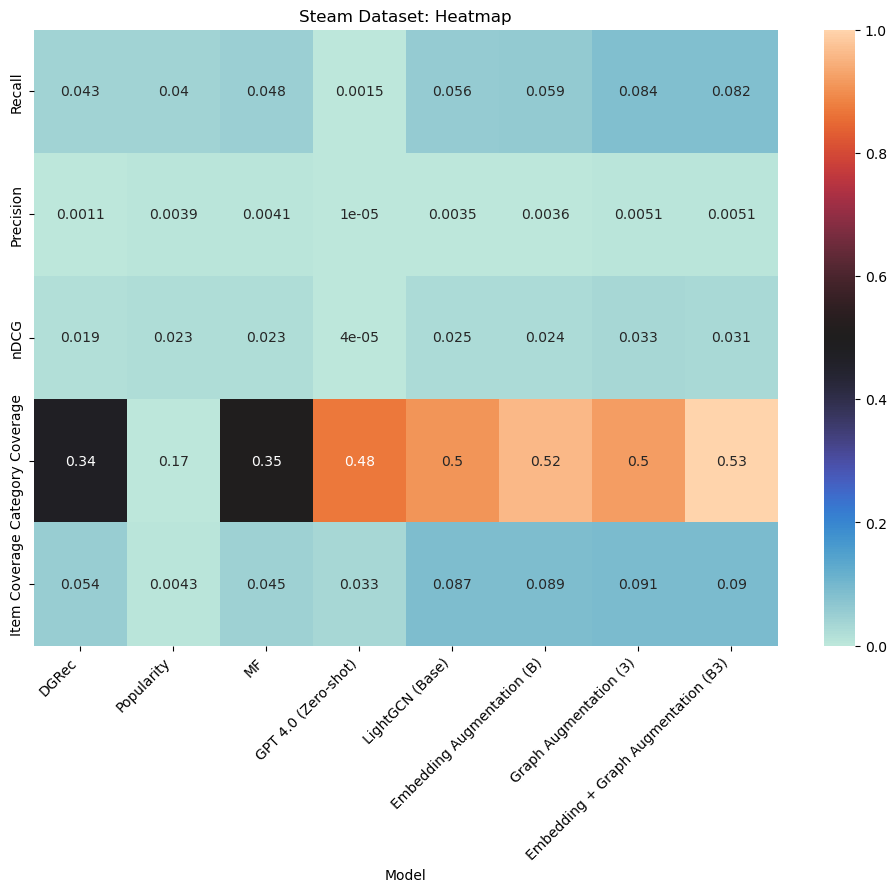

In [52]:
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def rescale_color(data):
    """
    Rescales the data for color intensity without changing the actual value.
    """
    min_val = data.min()
    max_val = data.max()
    if max_val - min_val == 0:
        return data  # Avoid division by zero
    return (data - min_val) / (max_val - min_val)

def plot_updated_heatmap(df, title):
    """
    Plots a heatmap where only the color intensity for Category Coverage is rescaled.
    """
    plt.figure(figsize=(12, 8))
    heatmap_data = df.set_index('Model').T

    # Create a copy for color scaling while keeping the original values for annotation
    color_scaled_data = heatmap_data.copy()

    # Rescale only the color for the Category Coverage metric
    if 'Category Coverage' in color_scaled_data.index:
        color_scaled_data.loc['Category Coverage'] = rescale_color(color_scaled_data.loc['Category Coverage'])
    
    # Adjust the color normalization dynamically to avoid white patches
    norm = mcolors.Normalize(vmin=color_scaled_data.min().min(), vmax=color_scaled_data.max().max())
    
    # Plot the heatmap with the improved colormap and normalization
    sns.heatmap(color_scaled_data, annot=heatmap_data, cmap=sns.color_palette("icefire", as_cmap=True), norm=norm)
    plt.title(title + ': Heatmap')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees
    plt.show()


# Example usage:
plot_updated_heatmap(ml1m_df, 'ML-1M Dataset')
plot_updated_heatmap(steam_df, 'Steam Dataset')


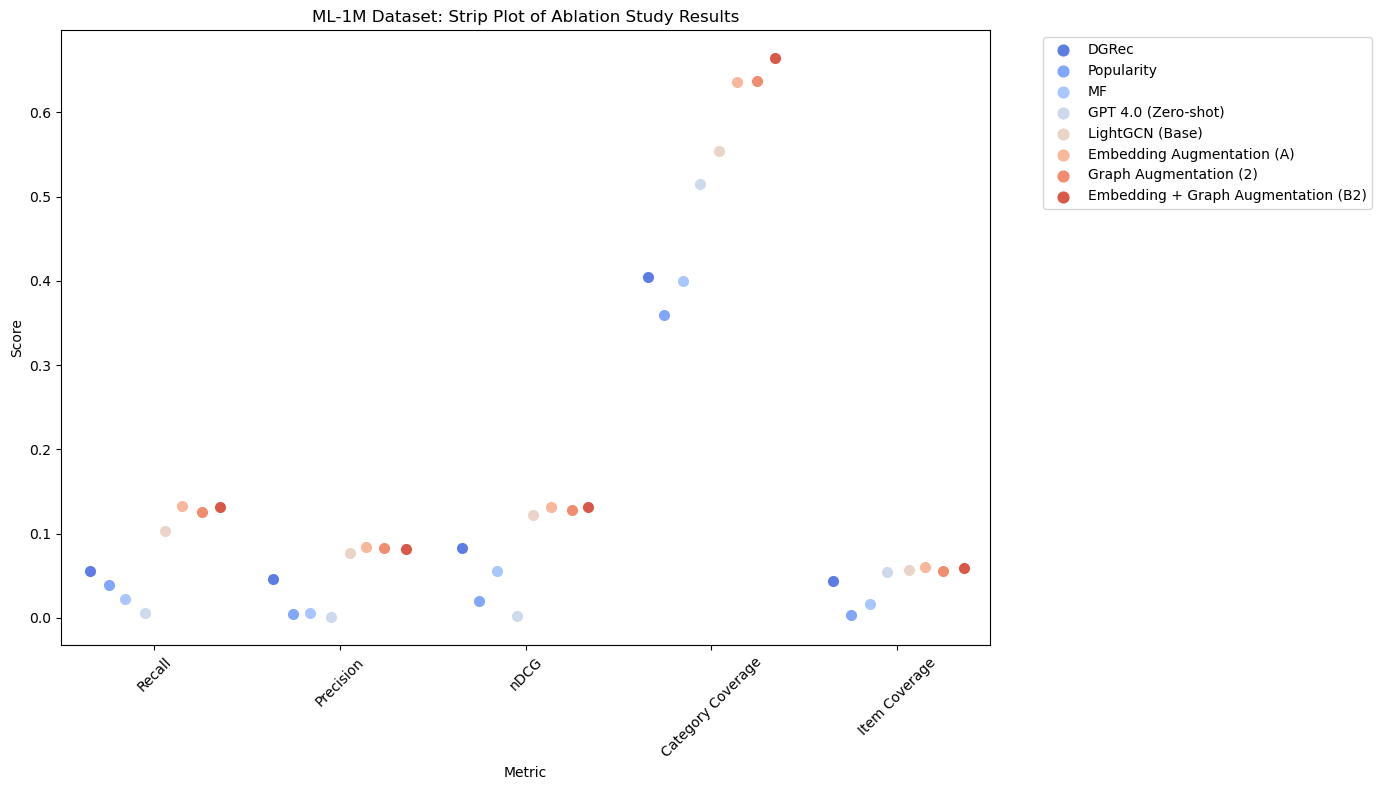

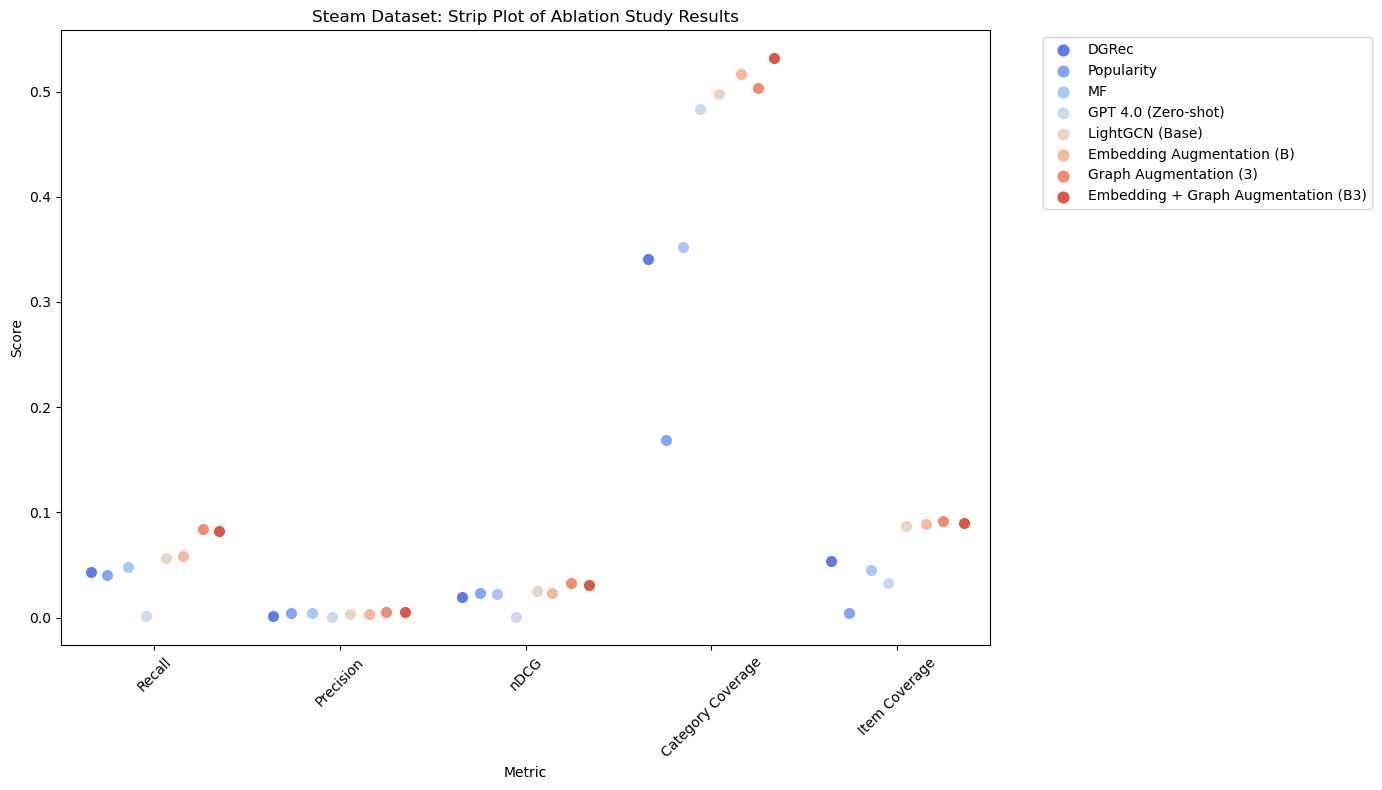

In [85]:
# Strip Plot for Ablation Studies
def strip_plot(df, title):
    metrics = ['Recall', 'Precision', 'nDCG', 'Category Coverage', 'Item Coverage']
    melted_df = df.melt(id_vars='Model', value_vars=metrics)
    plt.figure(figsize=(14, 8))
    sns.stripplot(data=melted_df, x='variable', y='value', hue='Model', jitter=True, dodge=True, palette='coolwarm', size=8)
    plt.title(title + ': Strip Plot of Ablation Study Results')
    plt.ylabel('Score')
    plt.xlabel('Metric')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example usage:
strip_plot(ml1m_df, 'ML-1M Dataset')
strip_plot(steam_df, 'Steam Dataset')

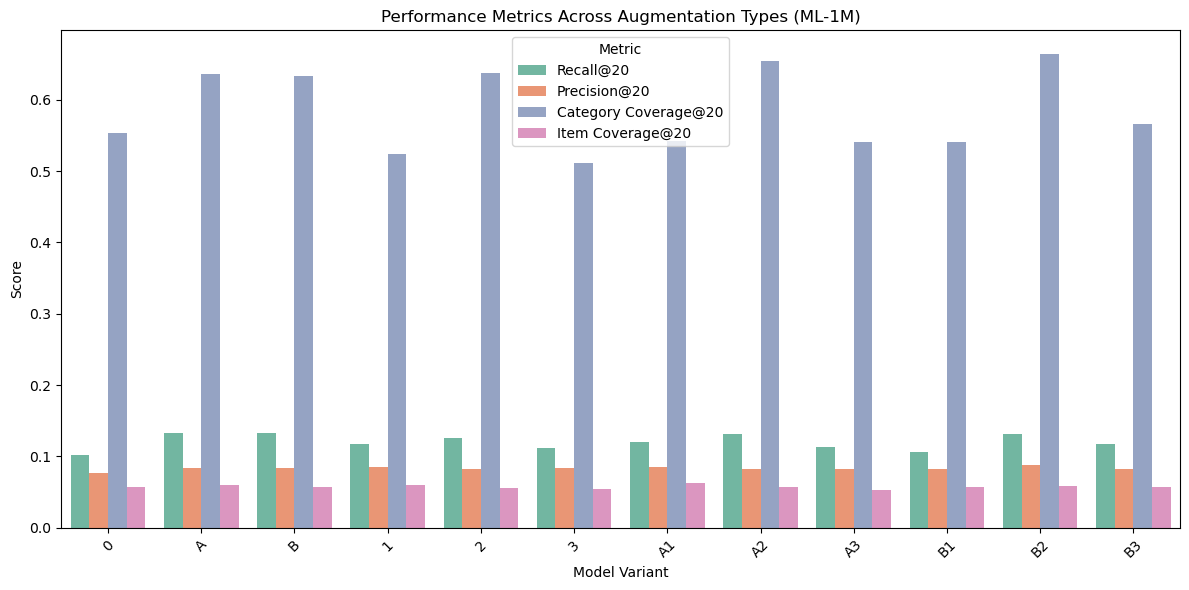

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the data from the ablation results
embedding_aug_ml1m = {
    'Model': ['0', 'A', 'B'],
    'Recall@20': [0.10248, 0.13215, 0.1324],
    'Precision@20': [0.07679, 0.08403, 0.08409],
    'Category Coverage@20': [0.5538, 0.63643, 0.63306],
    'Item Coverage@20': [0.05659, 0.0602, 0.05743],
    'Type': 'Embedding Augmentation'
}

graph_aug_ml1m = {
    'Model': ['0', '1', '2', '3'],
    'Recall@20': [0.10248, 0.11684, 0.12586, 0.11196],
    'Precision@20': [0.07679, 0.08496, 0.08287, 0.08358],
    'Category Coverage@20': [0.5538, 0.52381, 0.63777, 0.51136],
    'Item Coverage@20': [0.05659, 0.0597, 0.05573, 0.05414],
    'Type': 'Graph Augmentation'
}

combined_aug_ml1m = {
    'Model': ['0', 'A1', 'A2', 'A3', 'B1', 'B2', 'B3'],
    'Recall@20': [0.10248, 0.11988, 0.13091, 0.11297, 0.10564, 0.13202, 0.11739],
    'Precision@20': [0.07679, 0.0845, 0.08271, 0.08294, 0.08251, 0.0879, 0.08266],
    'Category Coverage@20': [0.5538, 0.54291, 0.65423, 0.54098, 0.54092, 0.66425, 0.56622],
    'Item Coverage@20': [0.05659,0.0621, 0.0572, 0.05229, 0.05705, 0.05908, 0.05701],
    'Type': 'Embedding + Graph Augmentation'
}

# Combine into a single DataFrame
df_embed = pd.DataFrame(embedding_aug_ml1m)
df_graph = pd.DataFrame(graph_aug_ml1m)
df_combined = pd.DataFrame(combined_aug_ml1m)

df_all = pd.concat([df_embed, df_graph, df_combined], ignore_index=True)

# Melt for visualization
df_melted = df_all.melt(id_vars=['Model', 'Type'], 
                        value_vars=['Recall@20', 'Precision@20', 'Category Coverage@20', 'Item Coverage@20'],
                        var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('Performance Metrics Across Augmentation Types (ML-1M)')
plt.xlabel('Model Variant')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


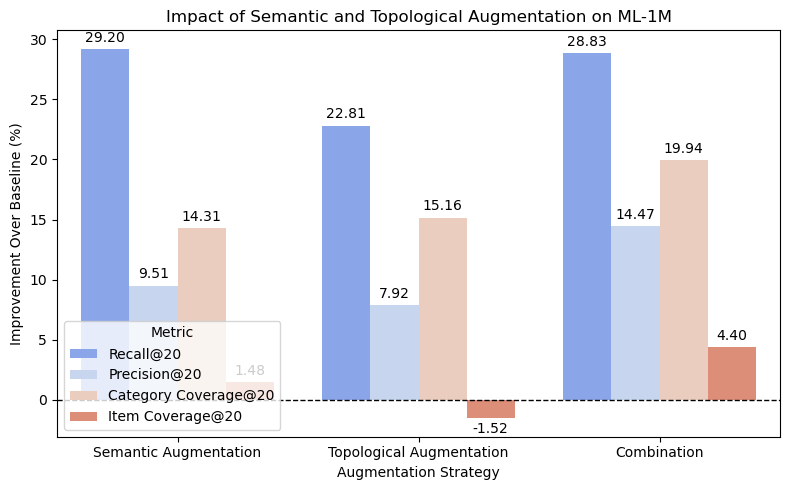

In [15]:
# Calculate percentage improvements over the baseline (Model '0') for ML-1M

# Baseline values
baseline = {
    'Recall@20': 0.10248,
    'Precision@20': 0.07679,
    'Category Coverage@20': 0.5538,
    'Item Coverage@20': 0.05659
}

# Filter out baseline model
df_improvements = df_all[df_all['Model'] != '0'].copy()

# Calculate improvements
for metric in ['Recall@20', 'Precision@20', 'Category Coverage@20' , 'Item Coverage@20']:
    df_improvements[metric] = (df_improvements[metric] - baseline[metric]) / baseline[metric] * 100

# Melt for plotting
df_improvement_melted = df_improvements.melt(id_vars=['Model', 'Type'],
                                              value_vars=['Recall@20', 'Precision@20', 'Category Coverage@20', 'Item Coverage@20'],
                                              var_name='Metric', value_name='Improvement (%)')

model_labels = {
    'B': 'Semantic Augmentation',
    '2': 'Topological Augmentation',
    'B2': 'Combination'
}

df_key = df_improvement_melted[df_improvement_melted['Model'].isin(model_labels.keys())].copy()
df_key['Model'] = df_key['Model'].map(model_labels)


# Create the same plot but with value annotations
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=df_key, x='Model', y='Improvement (%)', hue='Metric', palette='coolwarm')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Impact of Semantic and Topological Augmentation on ML-1M')
plt.xlabel('Augmentation Strategy')
plt.ylabel('Improvement Over Baseline (%)')
plt.legend(title='Metric', loc='lower left')

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()


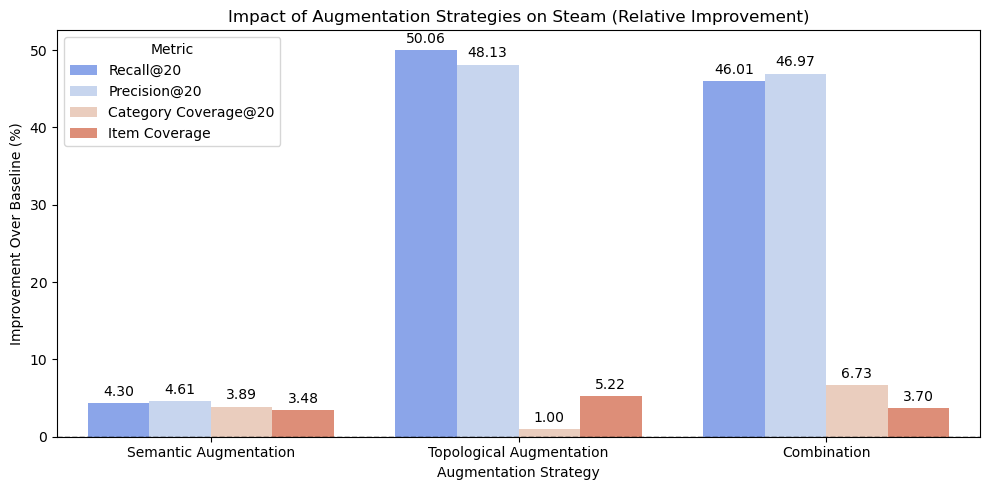

In [36]:
# Redefine Steam augmentation models using B, 3, B3
steam_subset_corrected = {
    'Model': ['B', '3', 'B3'],
    'Recall@20': [0.05869, 0.08444, 0.08216],
    'Precision@20': [0.00363, 0.00514, 0.0051],
    'Category Coverage@20': [0.5176, 0.50317, 0.53172],
    'Item Coverage': [0.08982, 0.091333, 0.09001]
}

# Create DataFrame
df_steam_corrected = pd.DataFrame(steam_subset_corrected)

# Compute improvements relative to baseline
for metric in steam_baseline.keys():
    df_steam_corrected[metric] = (df_steam_corrected[metric] - steam_baseline[metric]) / steam_baseline[metric] * 100

# Melt for plotting
df_steam_melted_corrected = df_steam_corrected.melt(id_vars='Model', 
                                                    value_vars=list(steam_baseline.keys()), 
                                                    var_name='Metric', 
                                                    value_name='Improvement (%)')

# Relabel models
model_labels_steam_corrected = {'B': 'Semantic Augmentation', '3': 'Topological Augmentation', 'B3': 'Combination'}
df_steam_melted_corrected['Model'] = df_steam_melted_corrected['Model'].map(model_labels_steam_corrected)

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=df_steam_melted_corrected, x='Model', y='Improvement (%)', hue='Metric', palette='coolwarm')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Impact of Augmentation Strategies on Steam (Relative Improvement)')
plt.xlabel('Augmentation Strategy')
plt.ylabel('Improvement Over Baseline (%)')
plt.legend(title='Metric')

# Annotate bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()


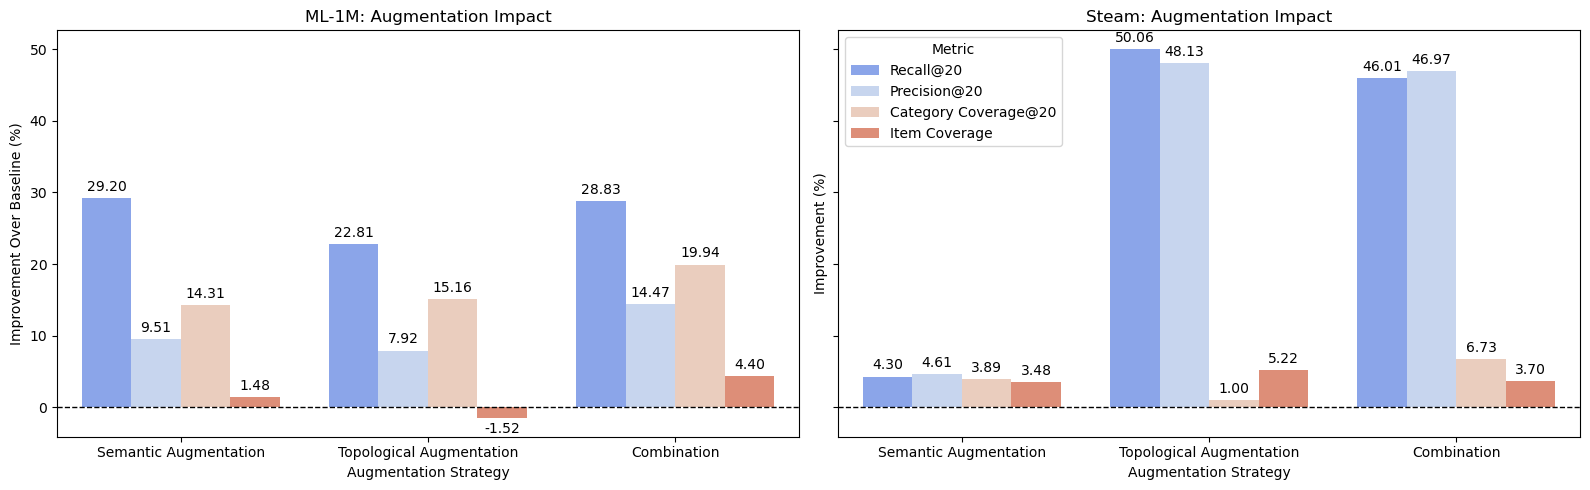

In [21]:
# Plot both ML-1M and Steam results side by side using subplots

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# ML-1M barplot
sns.barplot(data=df_key, x='Model', y='Improvement (%)', hue='Metric', palette='coolwarm', ax=axs[0])
axs[0].set_title('ML-1M: Augmentation Impact')
axs[0].set_xlabel('Augmentation Strategy')
axs[0].set_ylabel('Improvement Over Baseline (%)')
axs[0].axhline(0, color='black', linestyle='--', linewidth=1)

# Annotate ML-1M
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%.2f', padding=3)

# Steam barplot
sns.barplot(data=df_steam_melted_corrected, x='Model', y='Improvement (%)', hue='Metric', palette='coolwarm', ax=axs[1])
axs[1].set_title('Steam: Augmentation Impact')
axs[1].set_xlabel('Augmentation Strategy')
axs[1].axhline(0, color='black', linestyle='--', linewidth=1)

# Annotate Steam
for container in axs[1].containers:
    axs[1].bar_label(container, fmt='%.2f', padding=3)

# Handle legend
handles, labels = axs[1].get_legend_handles_labels()
axs[0].legend_.remove()
axs[1].legend(handles=handles, labels=labels, title='Metric')

plt.tight_layout()
plt.show()


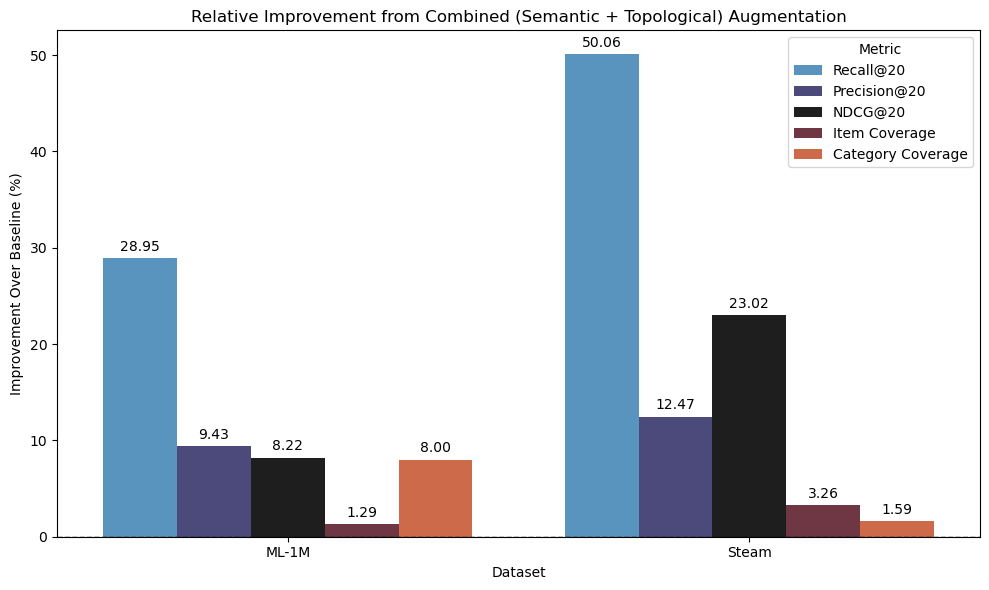

In [ ]:
# Define final improvement values based on your provided summary
final_comb_data = pd.DataFrame({
    'Dataset': ['ML-1M'] * 5 + ['Steam'] * 5,
    'Metric': ['Recall@20', 'Precision@20', 'NDCG@20', 'Item Coverage', 'Category Coverage'] * 2,
    'Improvement (%)': [
        28.95, 9.43, 8.22, 1.29, 8.00,   # ML-1M
        50.06, 12.47, 23.02, 3.26, 1.59  # Steam
    ]
})

# Plot clean, clear comparison
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=final_comb_data, x='Dataset', y='Improvement (%)', hue='Metric', palette='icefire')

plt.title('Relative Improvement from Combined (Semantic + Topological) Augmentation')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.ylabel('Improvement Over Baseline (%)')

# Annotate
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()


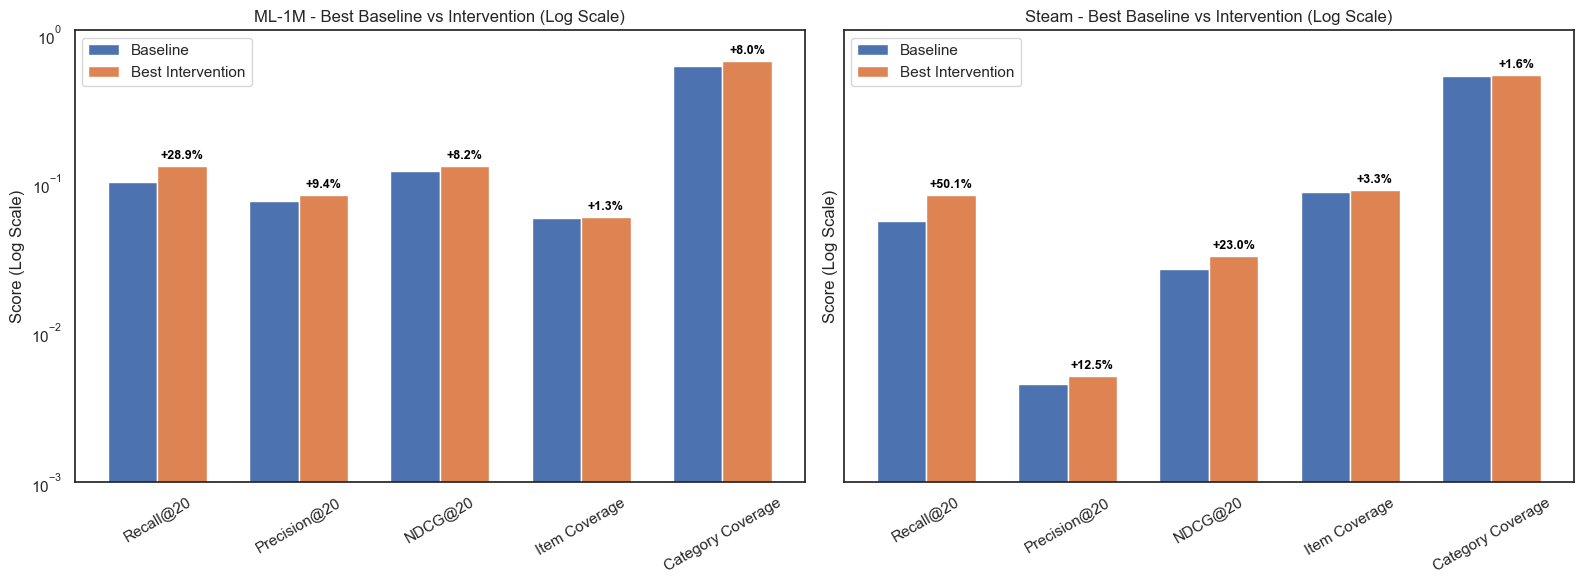

In [109]:
# Create refined dataset manually
refined_data = {
    'Dataset': ['ML-1M'] * 5 + ['Steam'] * 5,
    'Metric': ['Recall@20', 'Precision@20', 'NDCG@20', 'Item Coverage', 'Category Coverage'] * 2,
    'Baseline Score': [0.10248, 0.07679, 0.12142, 0.05943, 0.61506, 0.05627, 0.00457, 0.02669, 0.08845, 0.52340],
    'Best Intervention Score': [0.13215, 0.08403, 0.1314, 0.0602, 0.66425, 0.08444, 0.00514, 0.03284, 0.091333, 0.53172],
    'Improvement (%)': [28.95, 9.43, 8.22, 1.29, 8.00, 50.06, 12.47, 23.02, 3.26, 1.59]
}

df_refined = pd.DataFrame(refined_data)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Re-plot with y-axis in log scale to accommodate score variation
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.set(style="white", palette='icefire')

icefire_colors = sns.color_palette('icefire')

for i, dataset in enumerate(['ML-1M','Steam']):
    ax = axes[i]
    subset = df_refined[df_refined['Dataset'] == dataset].copy()
    x = np.arange(len(subset))

    bar_width = 0.35
    bars1 = ax.bar(x - bar_width / 2, subset['Baseline Score'], bar_width, label='Baseline')
    bars2 = ax.bar(x + bar_width / 2, subset['Best Intervention Score'], bar_width, label='Best Intervention')

    ax.set_xticks(x)
    ax.set_xticklabels(subset['Metric'], rotation=30)
    ax.set_title(f'{dataset} - Best Baseline vs Intervention (Log Scale)')
    ax.set_ylabel('Score (Log Scale)')
    ax.set_yscale('log')
    ax.set_ylim(bottom=1e-3, top=max(subset['Best Intervention Score'].max(), subset['Baseline Score'].max()) * 2)
    ax.legend()

    # Annotate improvement
    for j in range(len(subset)):
        y = subset['Best Intervention Score'].iloc[j]
        improvement = subset['Improvement (%)'].iloc[j]
        ax.annotate(f'+{improvement:.1f}%', xy=(x[j] + bar_width / 2, y), xytext=(0, 5),
                    textcoords='offset points', ha='center', fontsize=9, color='black', fontweight='bold')

plt.tight_layout()
plt.show()


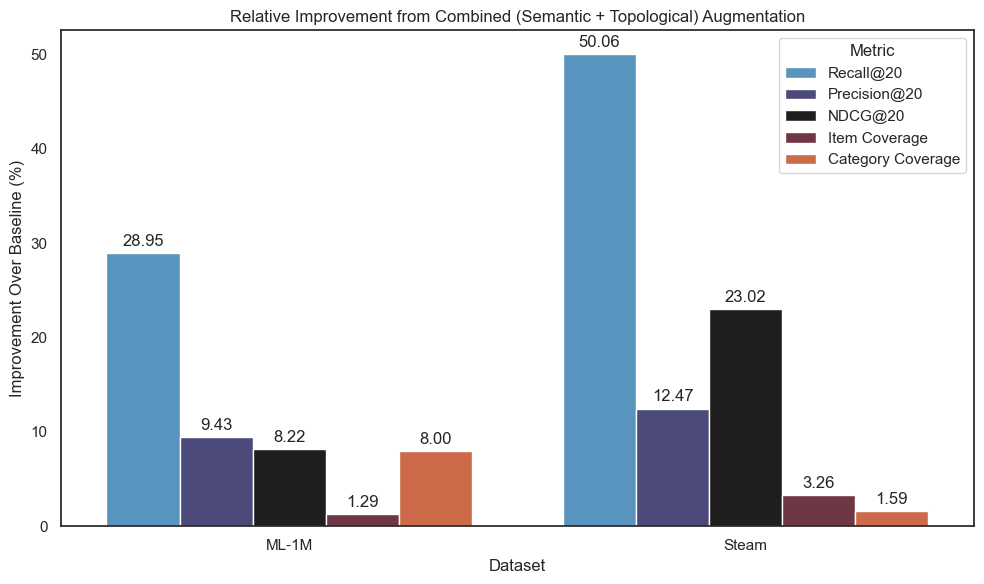

In [110]:
# Plot improvement grouped by dataset using the actual improvement values from df_refined
plt.figure(figsize=(10, 6))
sns.set(style="white")

# Recreate the hue order to match the actual Metric order for clarity
metric_order = ['Recall@20', 'Precision@20', 'NDCG@20', 'Item Coverage', 'Category Coverage']
palette = sns.color_palette("icefire", n_colors=5)

# Ensure Metric column is ordered
df_refined['Metric'] = pd.Categorical(df_refined['Metric'], categories=metric_order, ordered=True)

# Plot
ax = sns.barplot(data=df_refined, x='Dataset', y='Improvement (%)', hue='Metric', palette=palette)

plt.title('Relative Improvement from Combined (Semantic + Topological) Augmentation')
plt.ylabel('Improvement Over Baseline (%)')
plt.xlabel('Dataset')

# Annotate improvement percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()


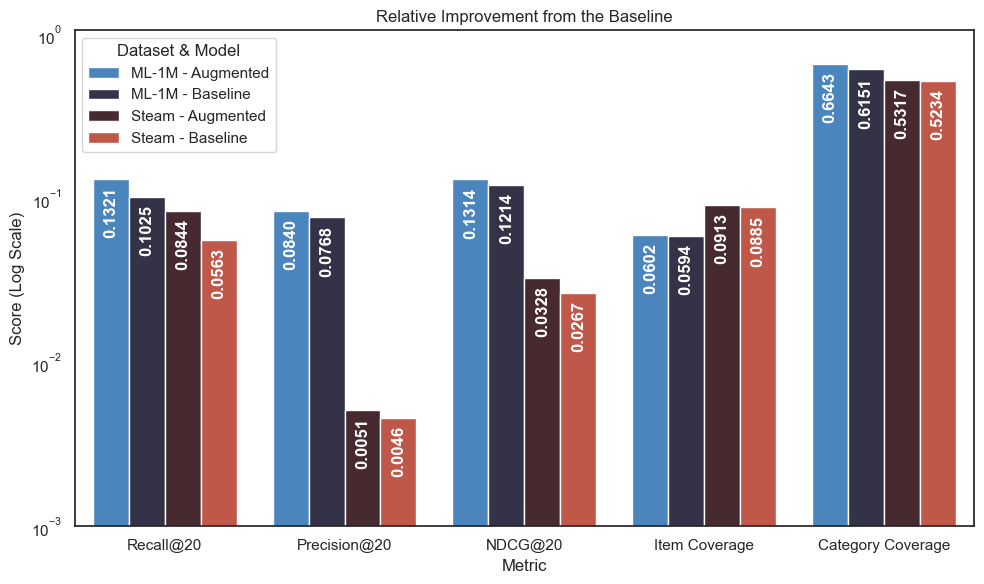

In [111]:

paired_data = {
    'Metric': df_refined['Metric'].tolist() * 2,
    'Score': df_refined['Baseline Score'].tolist() + df_refined['Best Intervention Score'].tolist(),
    'Dataset': df_refined['Dataset'].tolist() * 2,
    'Group': ['Baseline'] * len(df_refined) + ['Augmented'] * len(df_refined)
}

df_paired = pd.DataFrame(paired_data)
df_paired['Metric'] = pd.Categorical(df_paired['Metric'], categories=metric_order, ordered=True)

df_paired['Group'] = df_paired['Dataset'] + ' - ' + df_paired['Group']
df_paired_sorted = df_paired.sort_values(by=['Metric', 'Dataset', 'Group'])

# Use the provided improvement from df_refined directly for annotations
plt.figure(figsize=(10, 6))
sns.set(style="white")

# Plot sorted bars
ax = sns.barplot(data=df_paired_sorted, x='Metric', y='Score', hue='Group', palette='icefire', dodge=True)
plt.yscale('log')
plt.title('Relative Improvement from the Baseline')
plt.ylabel('Score (Log Scale)')
ax.set_ylim(bottom=1e-3, top=max(subset['Best Intervention Score'].max(), subset['Baseline Score'].max()) * 2)

plt.xlabel('Metric')

from collections import defaultdict
# Annotate bar positions for improvement annotations
bar_positions = defaultdict(dict)

for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    idx = list(ax.patches).index(bar)
    row = df_paired_sorted.iloc[idx]
    group = row['Group']
    metric = row['Metric']
    dataset = row['Dataset']
    key = f'{dataset}-{metric}'
    bar_type = 'Baseline' if 'Baseline' in group else 'Intervention'

    bar_positions[key][bar_type] = {'x': x, 'y': height}

    # Actual score label inside bar
    ax.annotate(f'{height:.4f}', xy=(x, height), xytext=(0, -6), textcoords='offset points',
                ha='center', va='top', fontsize=12, rotation=90,
                color='white' if height > 0.001 else 'black', fontweight='bold')

# Use improvement from df_refined
#for _, row in df_refined.iterrows():
#    key = f"{row['Dataset']}-{row['Metric']}"
#    if key in bar_positions and 'Intervention' in bar_positions[key]:
#        x_i = bar_positions[key]['Intervention']['x']
#        y_i = bar_positions[key]['Intervention']['y']
#        improvement = row['Improvement (%)']
#        ax.annotate(f'+{improvement:.1f}%', xy=(x_i, y_i), xytext=(0, 10),
#                    textcoords='offset points', ha='center', va='bottom',
#                    fontsize=12, color='black', fontweight='bold')

plt.legend(title='Dataset & Model', loc='upper left')
plt.tight_layout()
plt.show()
